# Associations between molecular and environmental changes along the proximal-to-distal axis of the colon
### Abstract
[ABSTRACT]
### About this notebook
This notebook allow to reproduce all the results and figures presented in [CITAZIONE] 

# Transcriptome profiling

In [2]:
import sys
sys.path.append("../../../git/lib") # Path to the profile_analysis_class.py file
from profile_analysis_class import ProfileAnalysis # Import the profile workflow class
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('../../assets/styles/plotting_style.mplstyle') # Path to the matplotlib style sheet
# Create workflow class, specifying the path to the SETTINGS.ini file
pa_transcriptome = ProfileAnalysis('../../../docker/analysis/transcriptome')

Project has been created!


/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:149: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:155: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:161: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_analysis/../../../git/lib/profile_analysis_class.py:167: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/git/notebooks/paper_anal

## Assign each sample in clinical data file to a colon section

In [2]:
pa_transcriptome.create_samples_to_sections_table()

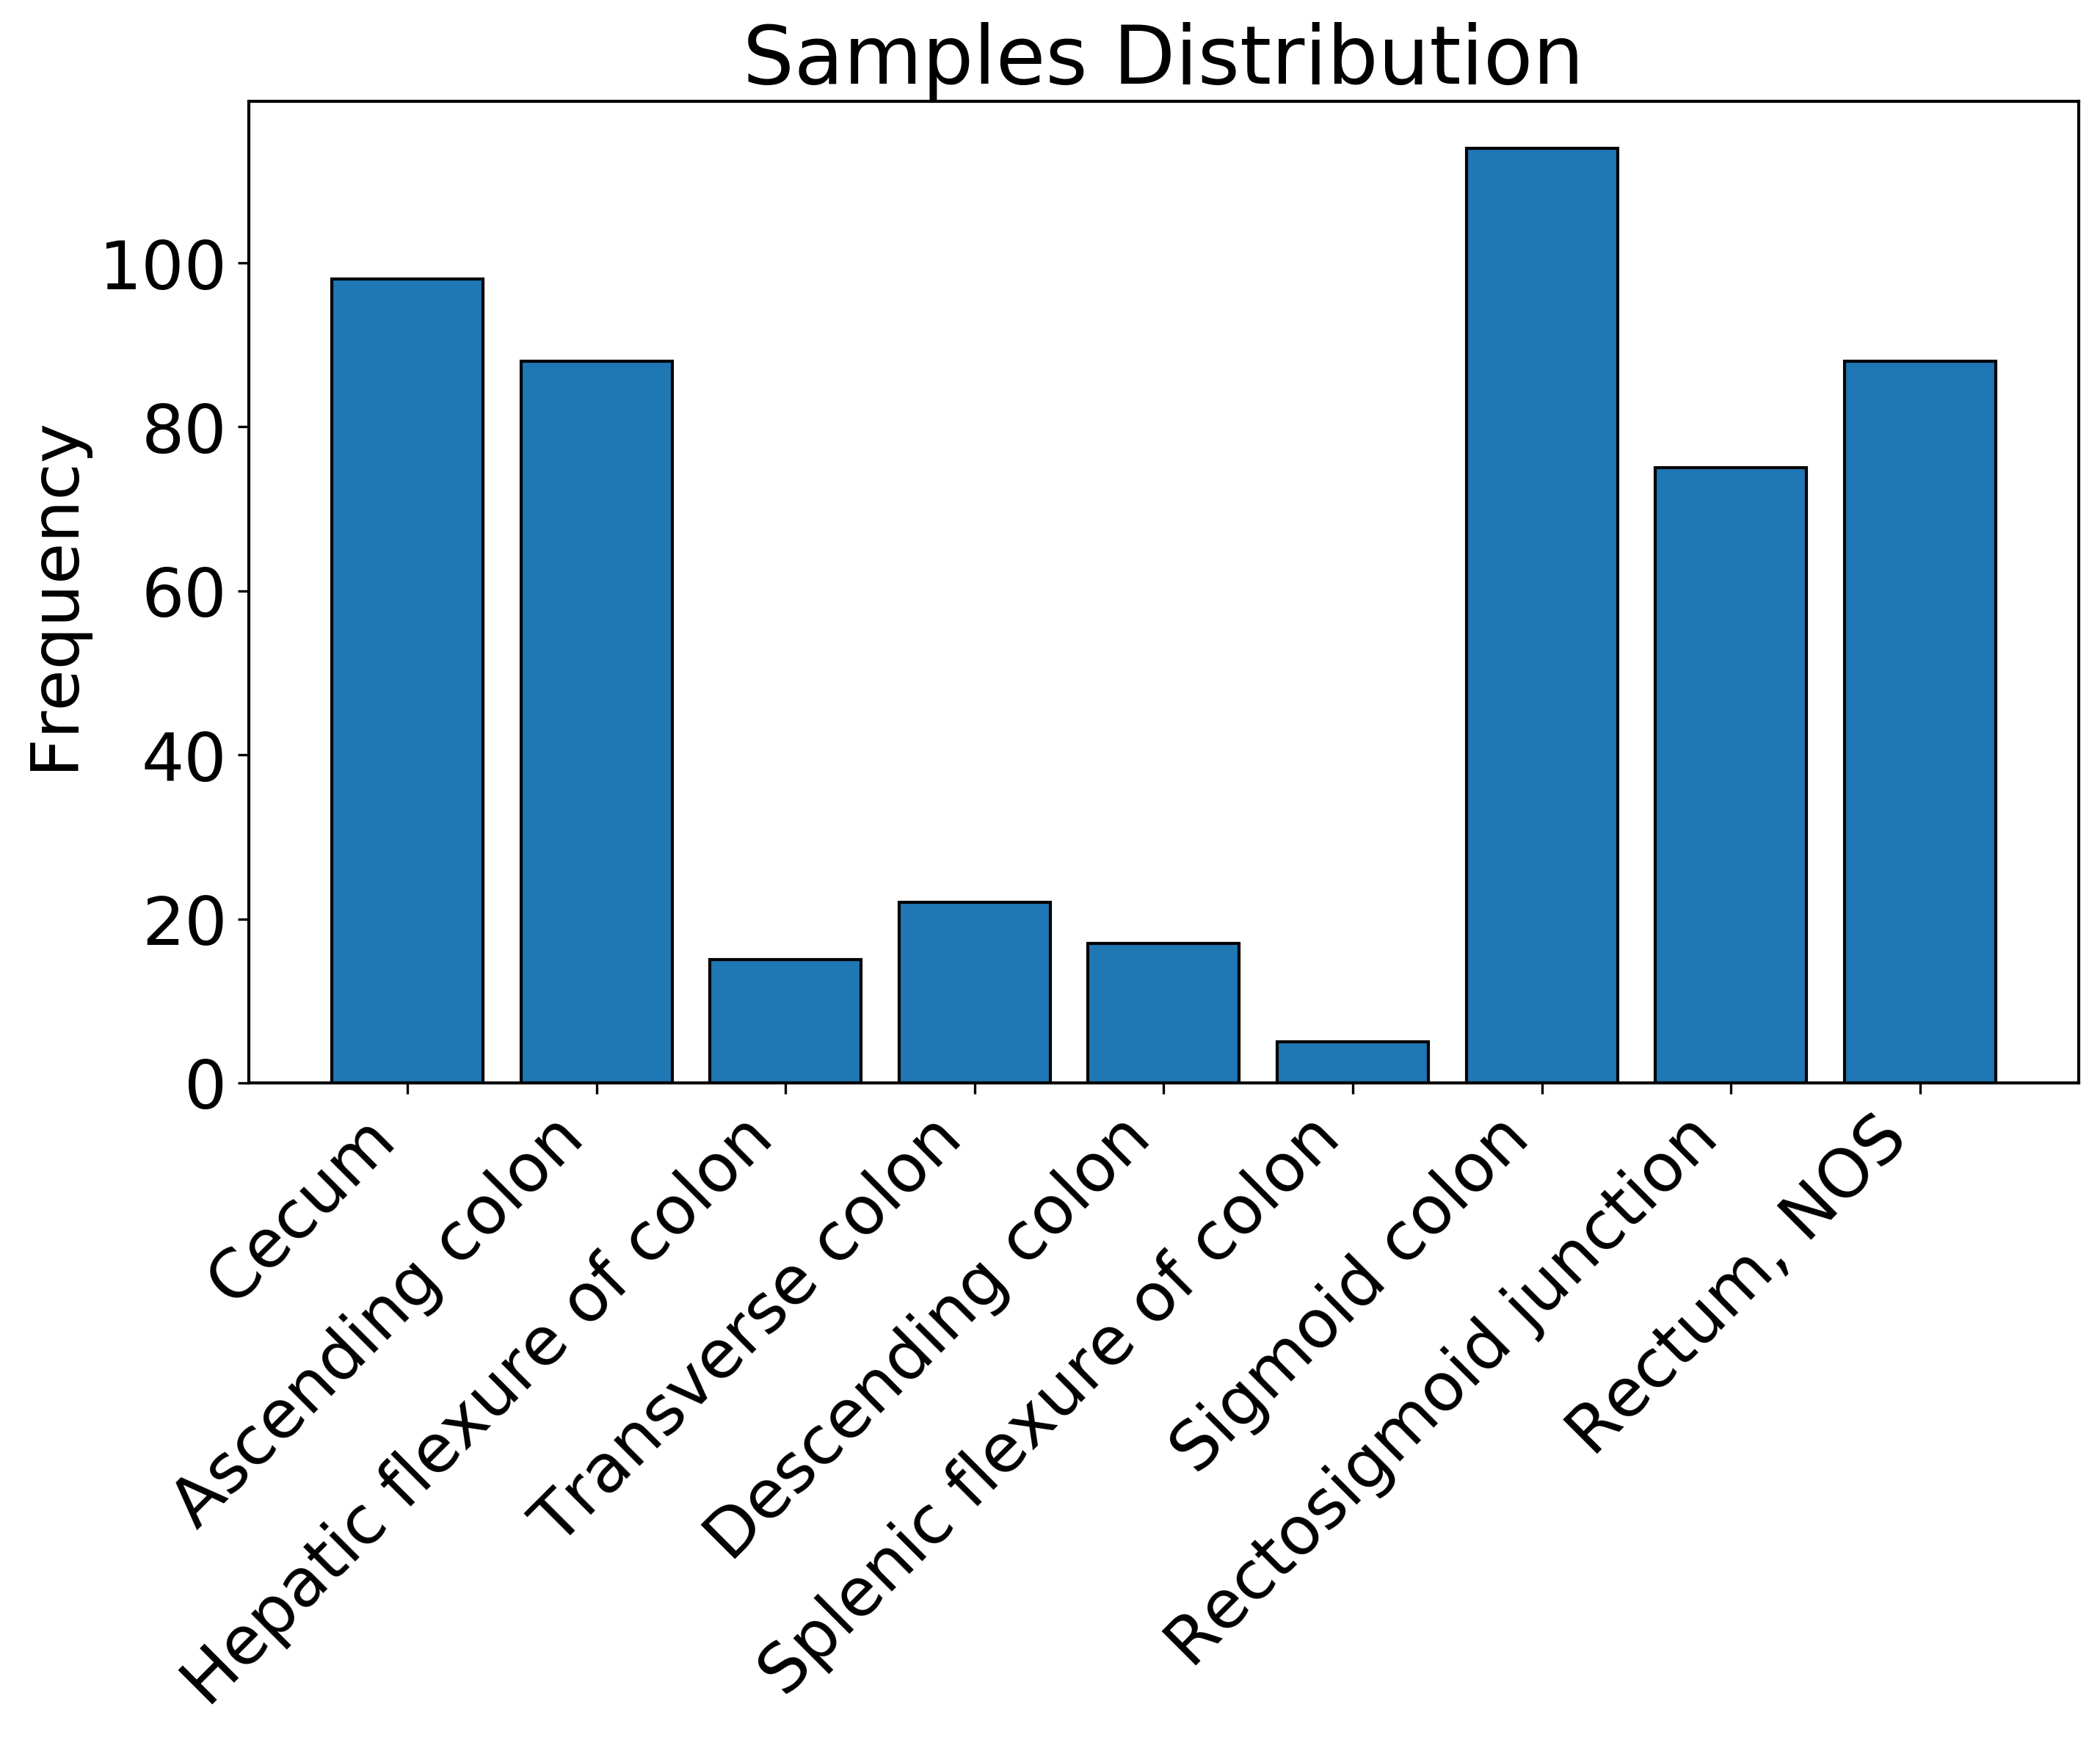

In [3]:
pa_transcriptome.plot_sample_distribution()

## Calculate median value for each colon section

In [4]:
medians_tr, mad_tr = pa_transcriptome.median_by_section()

This step has already been executed...loading results...
This step has already been executed...loading results...


In [5]:
medians_tr.head()

,Cecum,Ascending colon,Hepatic flexure of colon,Transverse colon,Descending colon,Sigmoid colon,Rectosigmoid junction,"Rectum, NOS"
ensmbl_id,,,,,,,,
ENSG00000000003,73.907526,78.403451,103.124233,75.913878,82.543993,132.823036,133.446046,100.606220
ENSG00000000005,1.008409,0.735658,1.336772,0.798797,1.680453,1.657560,1.893015,1.379483
ENSG00000000419,99.851076,104.284560,117.657759,97.626225,154.401872,170.663164,139.689173,144.105845
ENSG00000000457,6.921388,6.640371,7.004861,7.278464,7.113812,7.131714,7.116130,6.885216
ENSG00000000460,5.263295,4.969358,5.424937,4.844178,6.057782,5.991615,5.782876,6.181672


In [6]:
mad_tr.head()

,Unnamed: 0,Cecum,Ascending colon,Hepatic flexure of colon,Transverse colon,Descending colon,Sigmoid colon,Rectosigmoid junction,"Rectum, NOS"
0,ENSG00000000003,33.045419,38.799498,58.271199,30.181981,50.004580,46.806473,40.212477,34.390195
1,ENSG00000000005,0.861570,0.636900,1.336772,0.705742,1.163834,1.457359,1.642586,0.869259
2,ENSG00000000419,32.520453,33.029376,27.774534,24.913604,76.060263,50.032742,48.295106,45.392903
3,ENSG00000000457,1.570295,1.206098,1.909975,1.633780,1.147258,1.676726,1.764332,1.417251
4,ENSG00000000460,1.378870,1.584756,1.463548,1.399207,1.997586,1.643072,1.592896,1.930137


## Fit Observables

In [7]:
scores_tr, poly_obs_scores_tr, sig_obs_scores_tr, poly_models_tr, sig_models_tr = pa_transcriptome.fit_data(medians_tr, mad_tr, guess_bounds = True, dog_allowed=False)

This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...
This step has already been executed...loading results...


In [8]:
scores_tr.head()

,1,2,3,4,sigmoidal
ensmbl_id,,,,,
ENSG00000000003,0.441852,0.448167,0.538456,0.795159,0.698340
ENSG00000000005,0.484378,0.503558,0.695902,0.717411,0.725102
ENSG00000000419,0.554903,0.588714,0.708145,0.709273,0.847165
ENSG00000000457,0.121326,0.469814,0.598761,0.745593,0.558359
ENSG00000000460,0.582489,0.596877,0.653616,0.669227,0.839095


## Fit Random permutated data

In [9]:
poly_perm_scores_tr, sig_perm_scores_tr=pa_transcriptome.fit_random_data(medians_tr, mad_tr, guess_bounds = True, dog_allowed=True)

This step has already been executed...loading results...
This step has already been executed...loading results...


## Compare obrservable vs permutated data

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


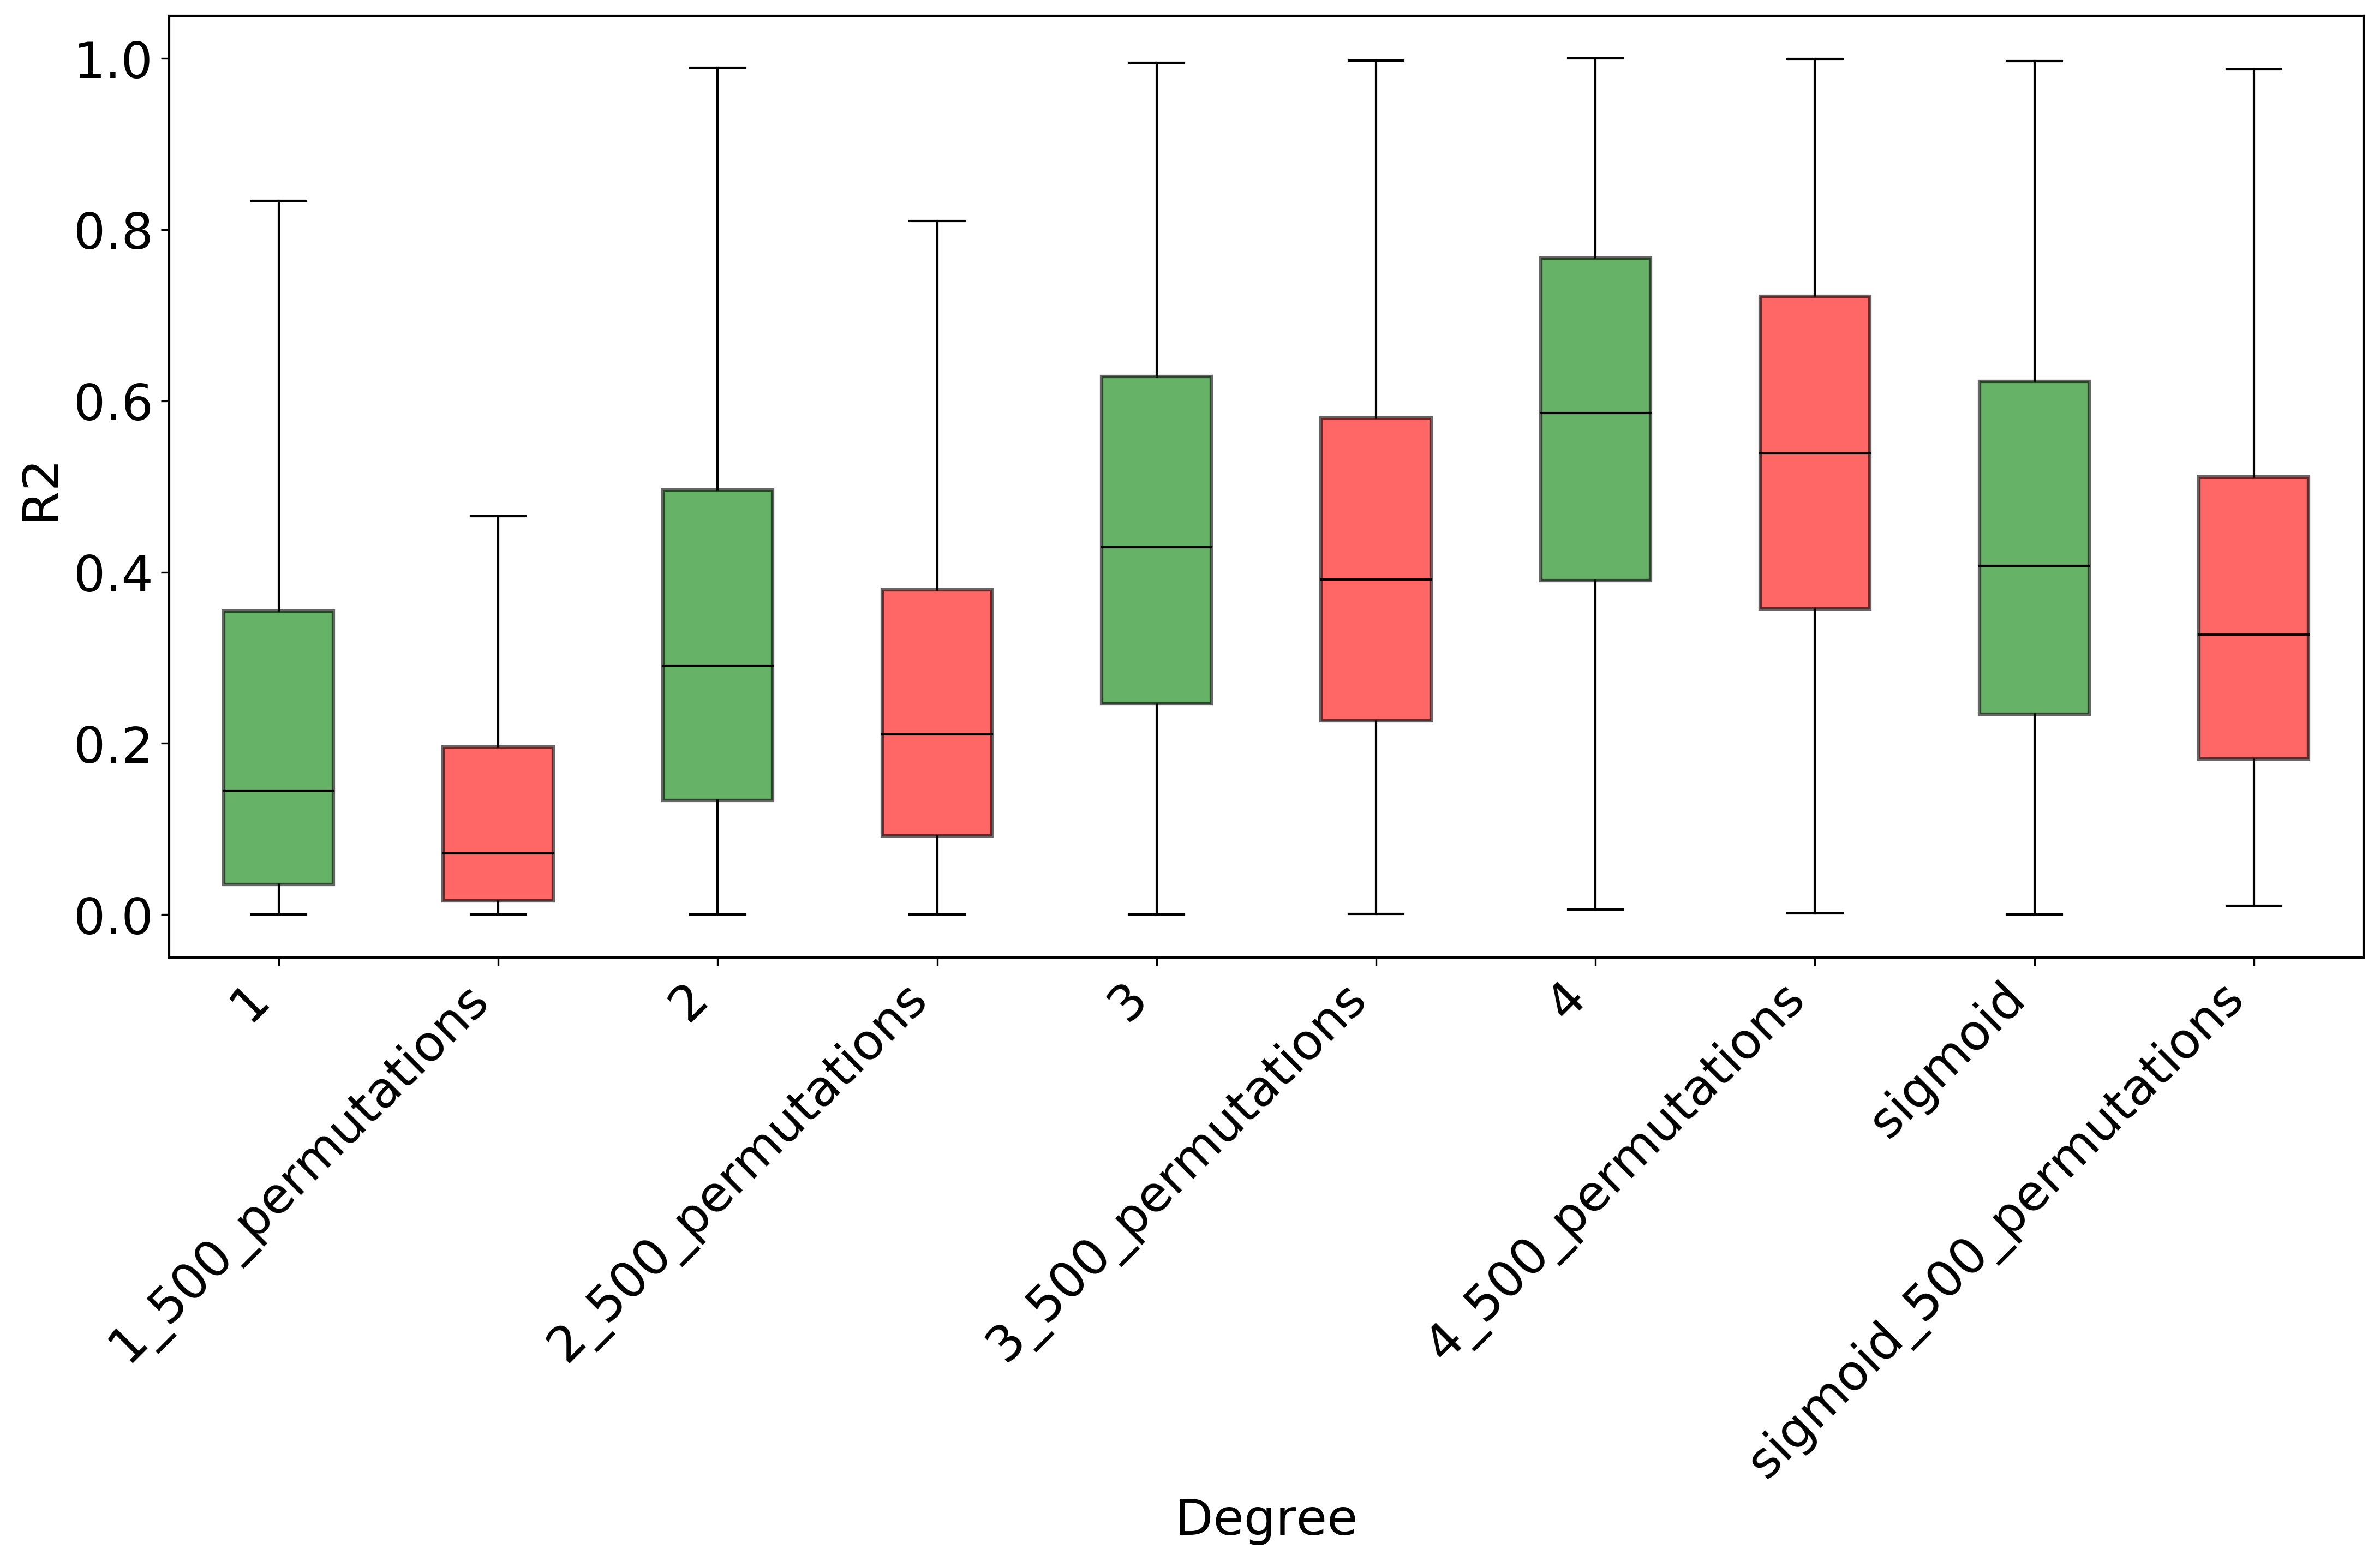

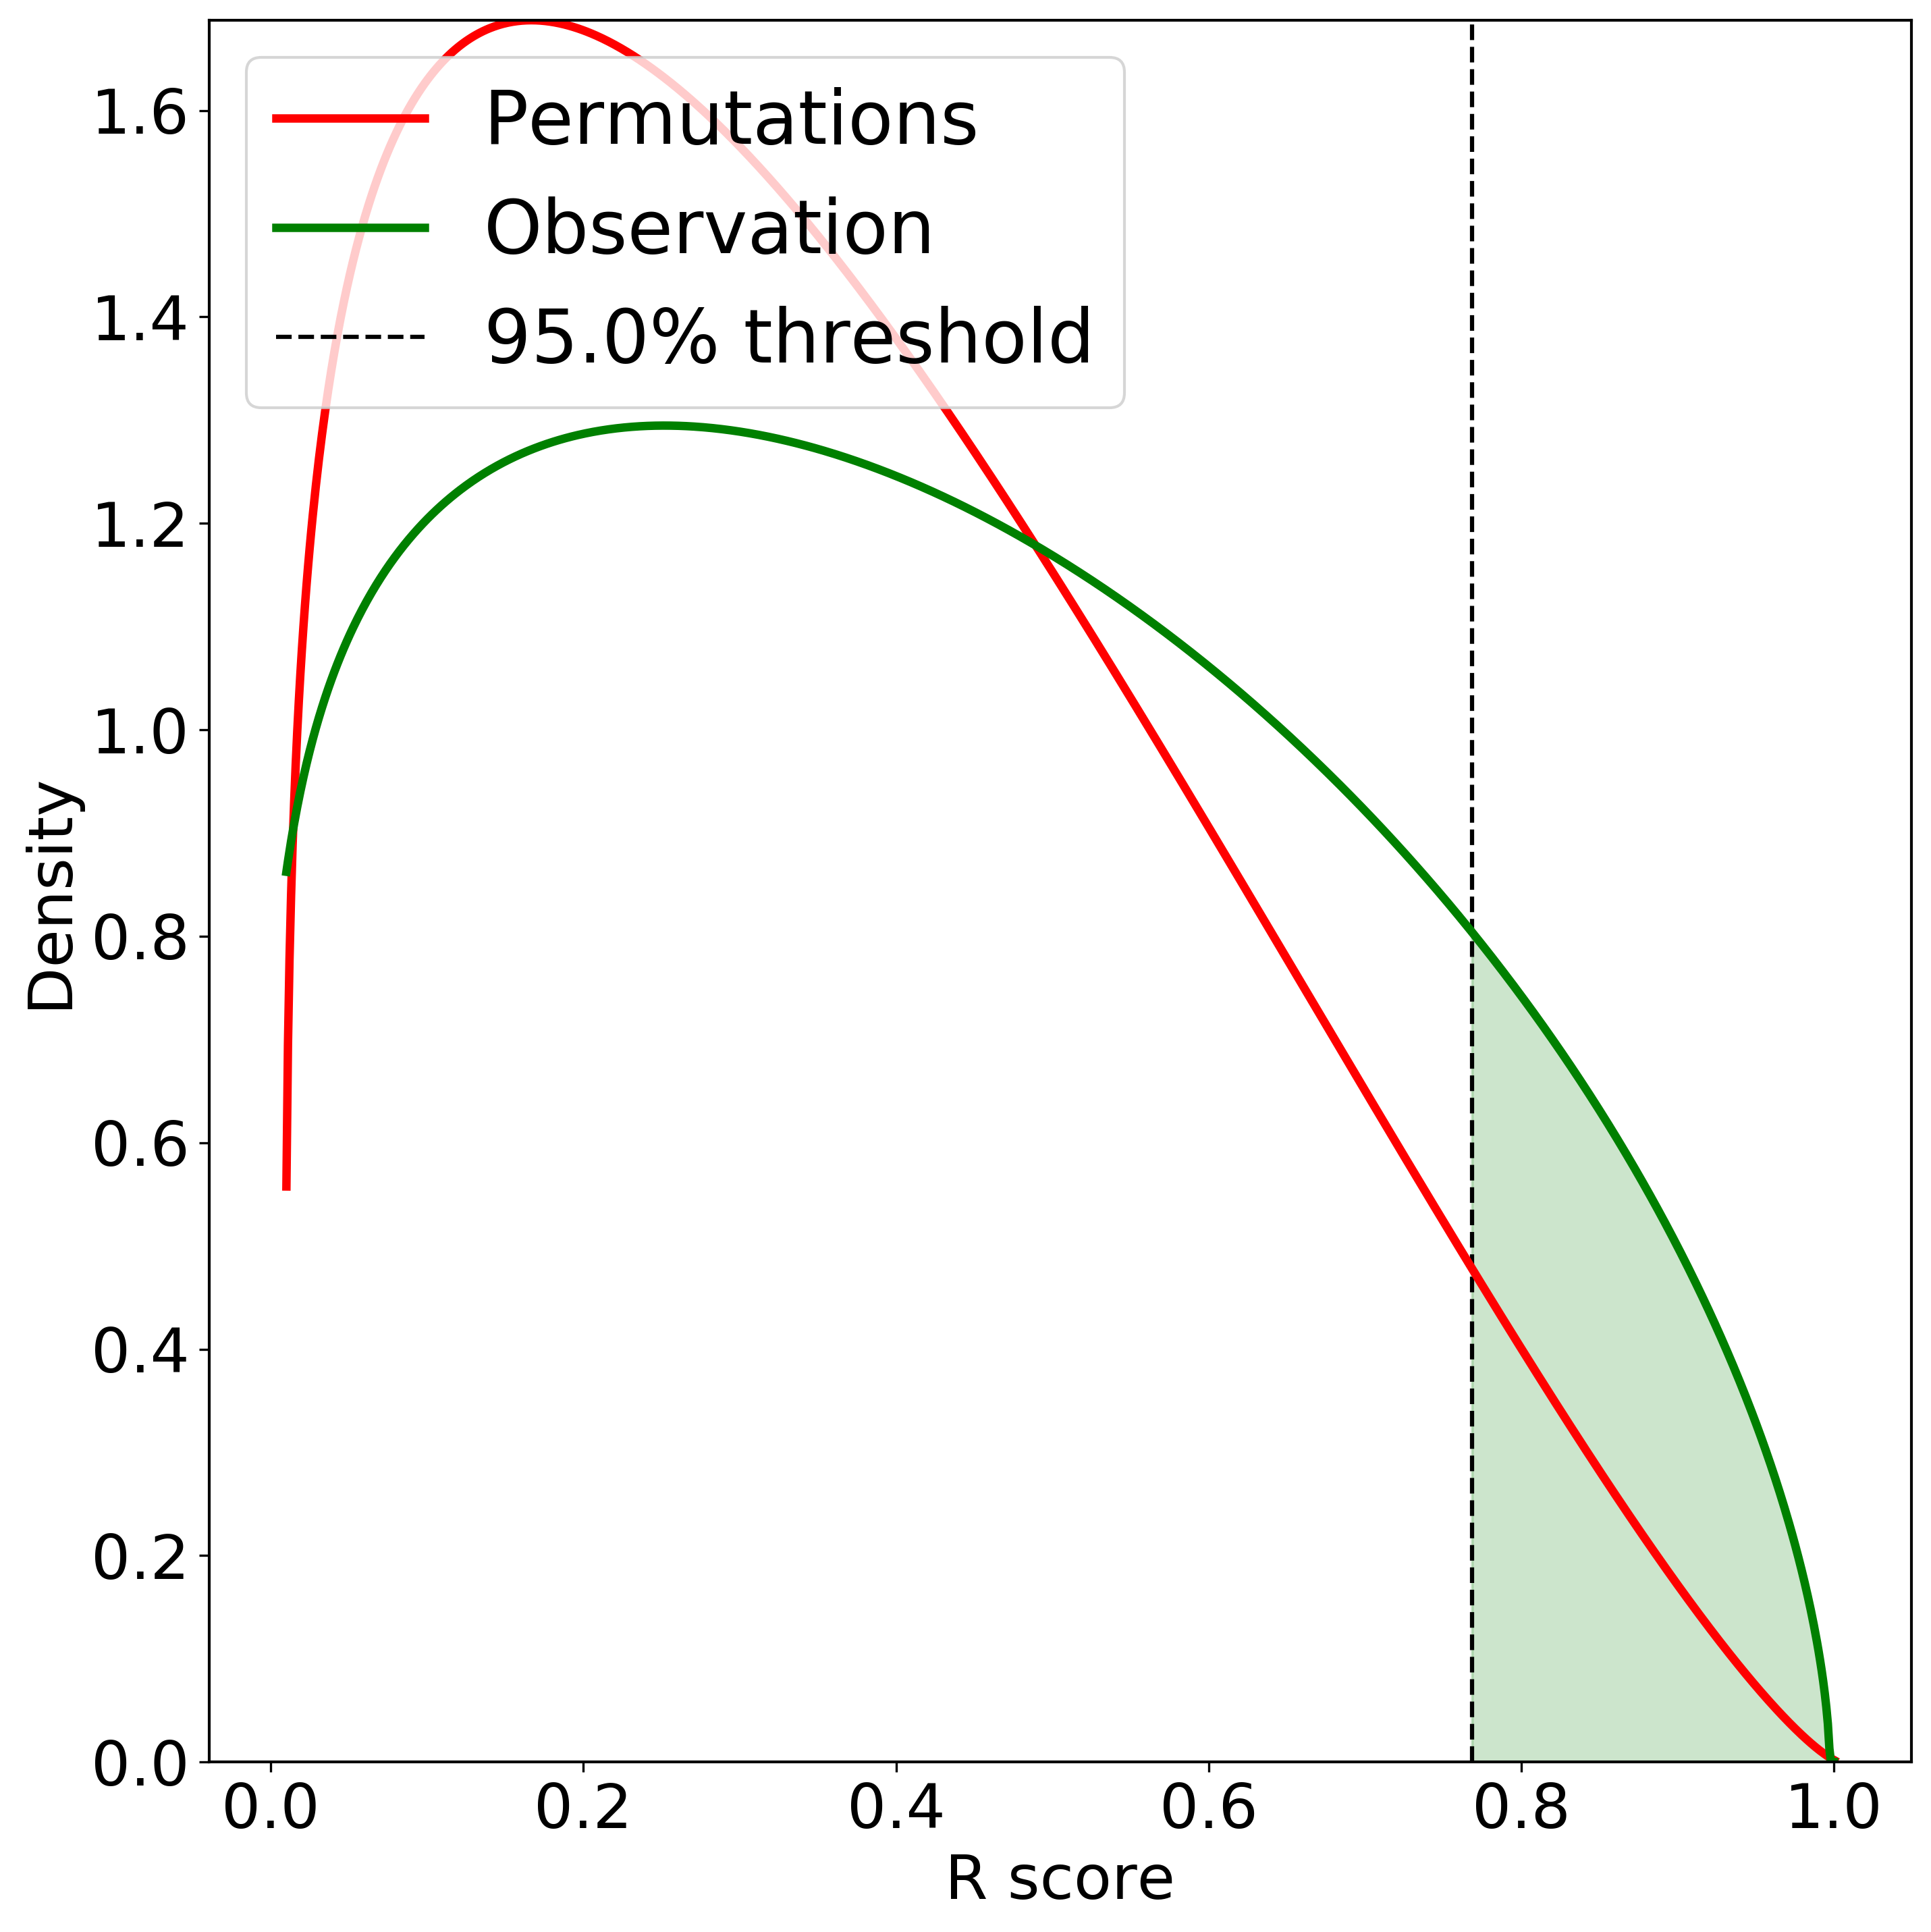

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


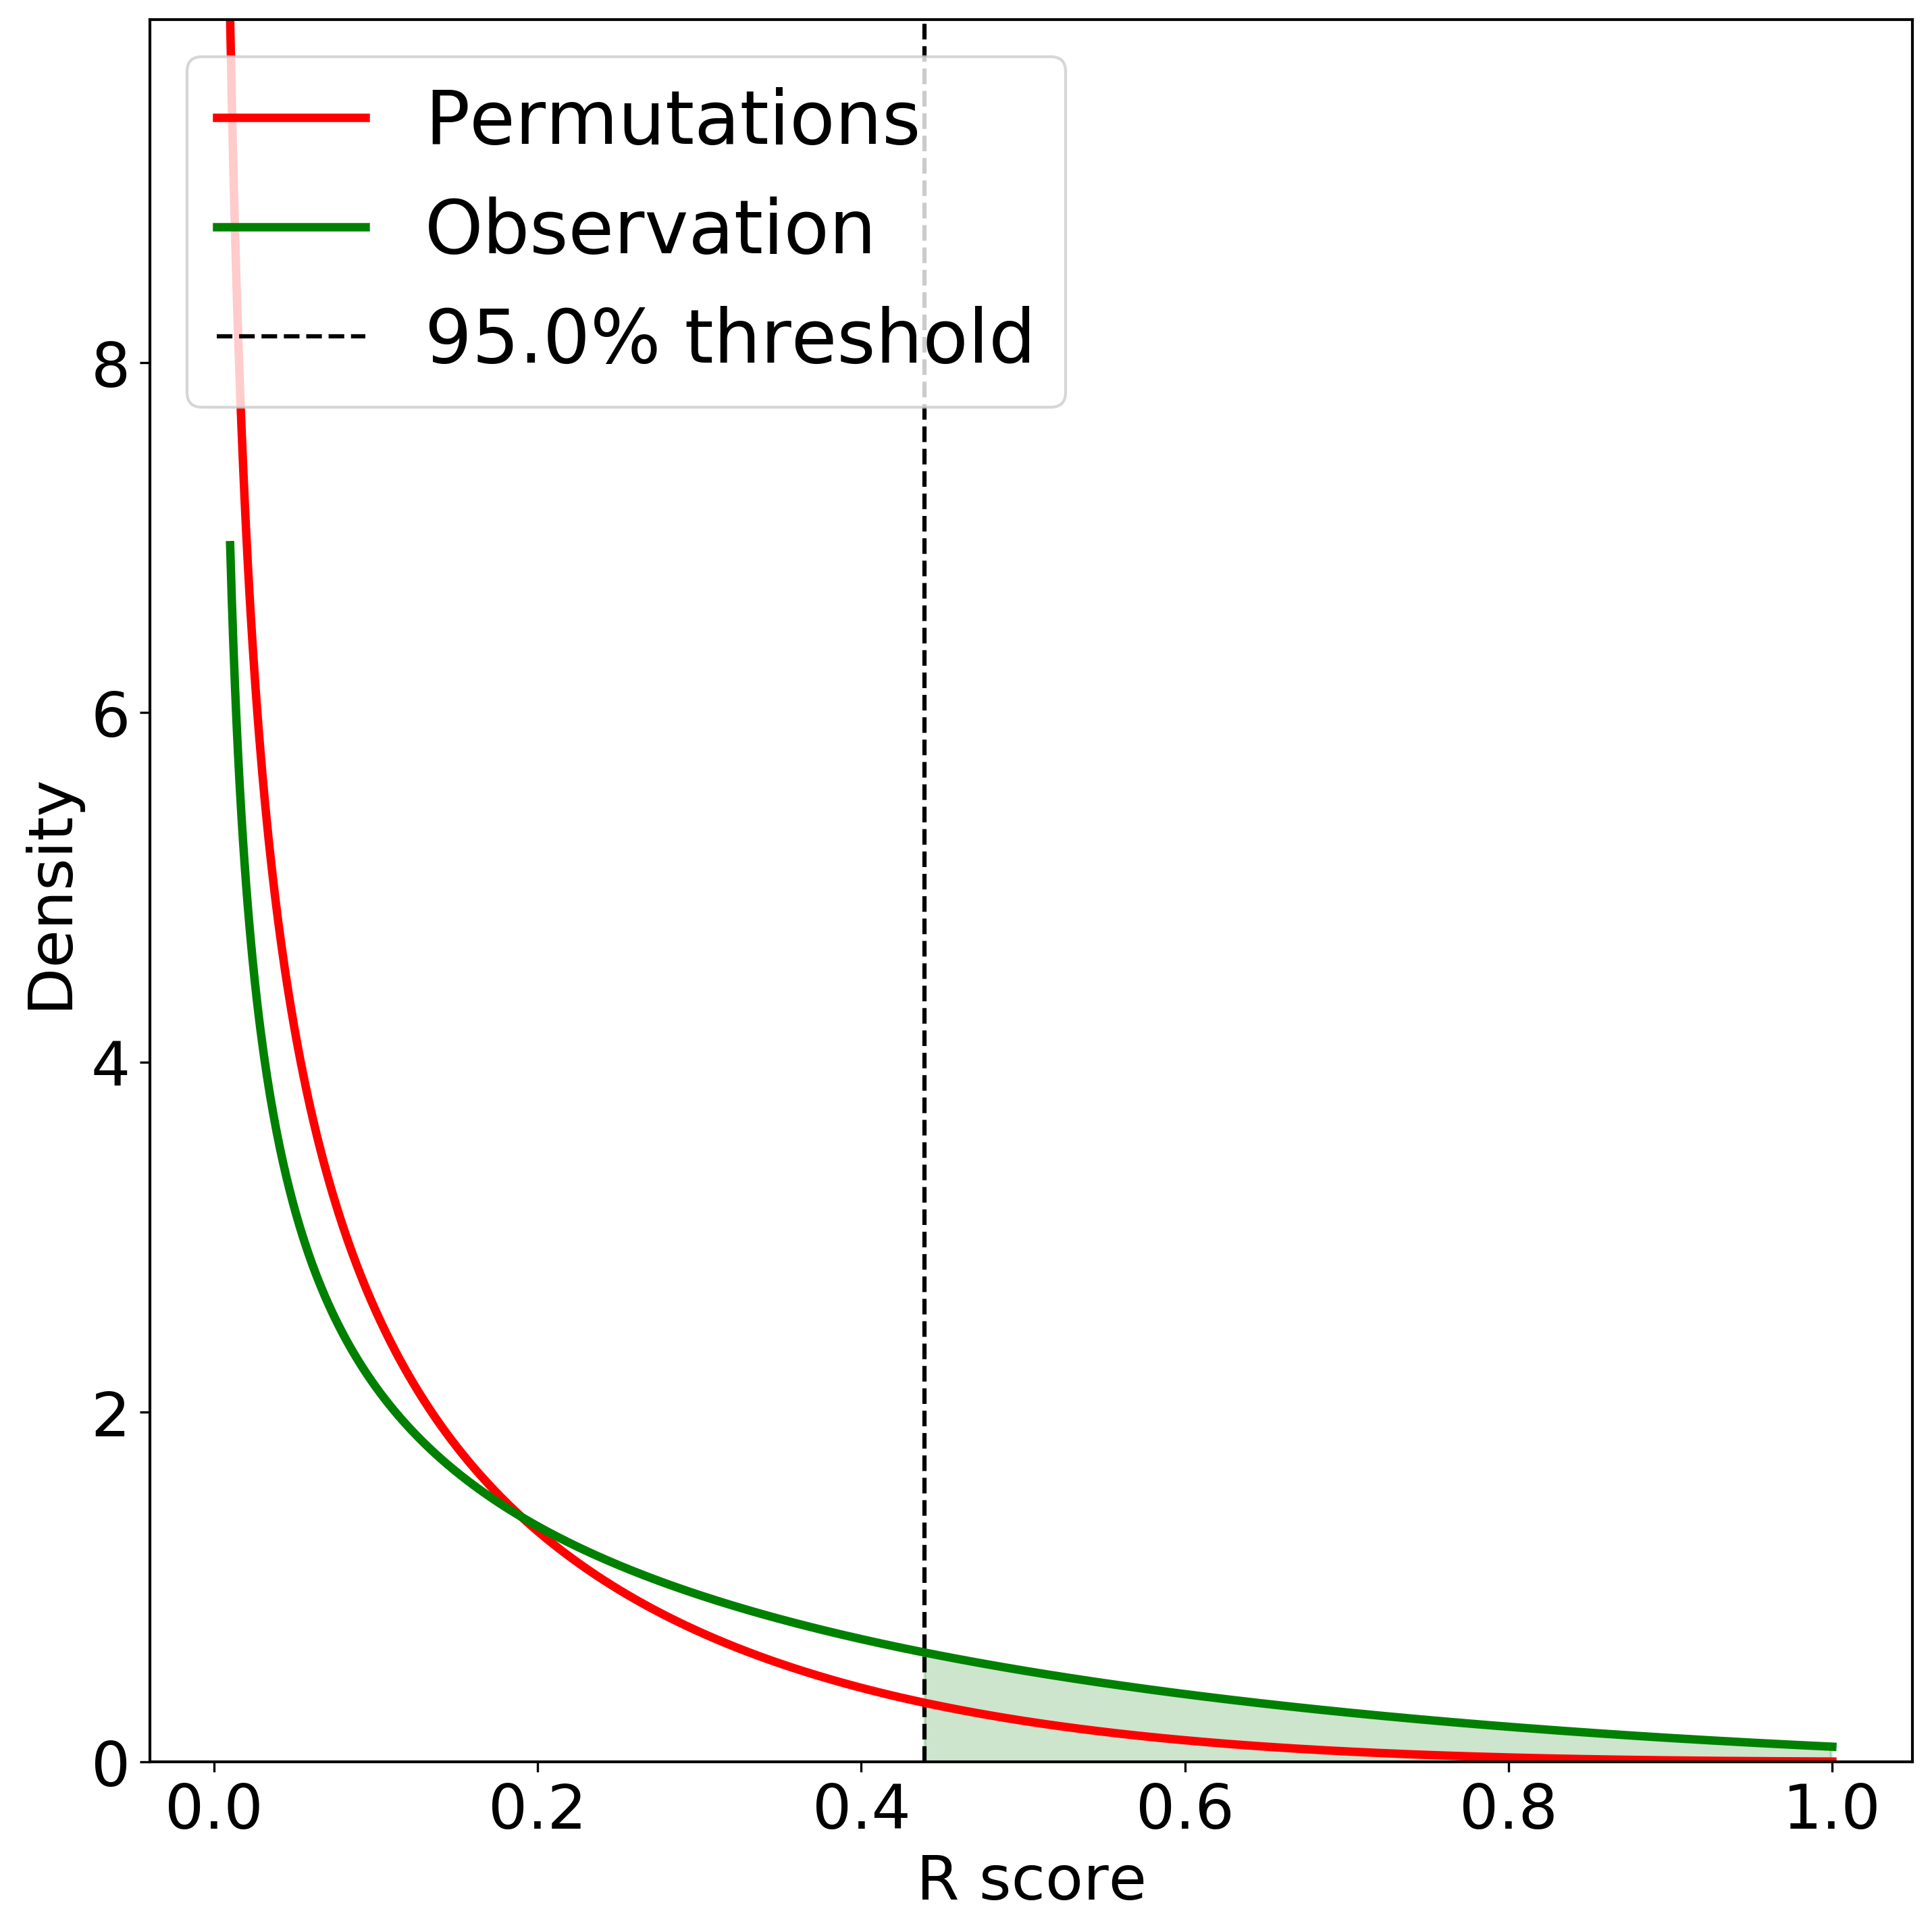

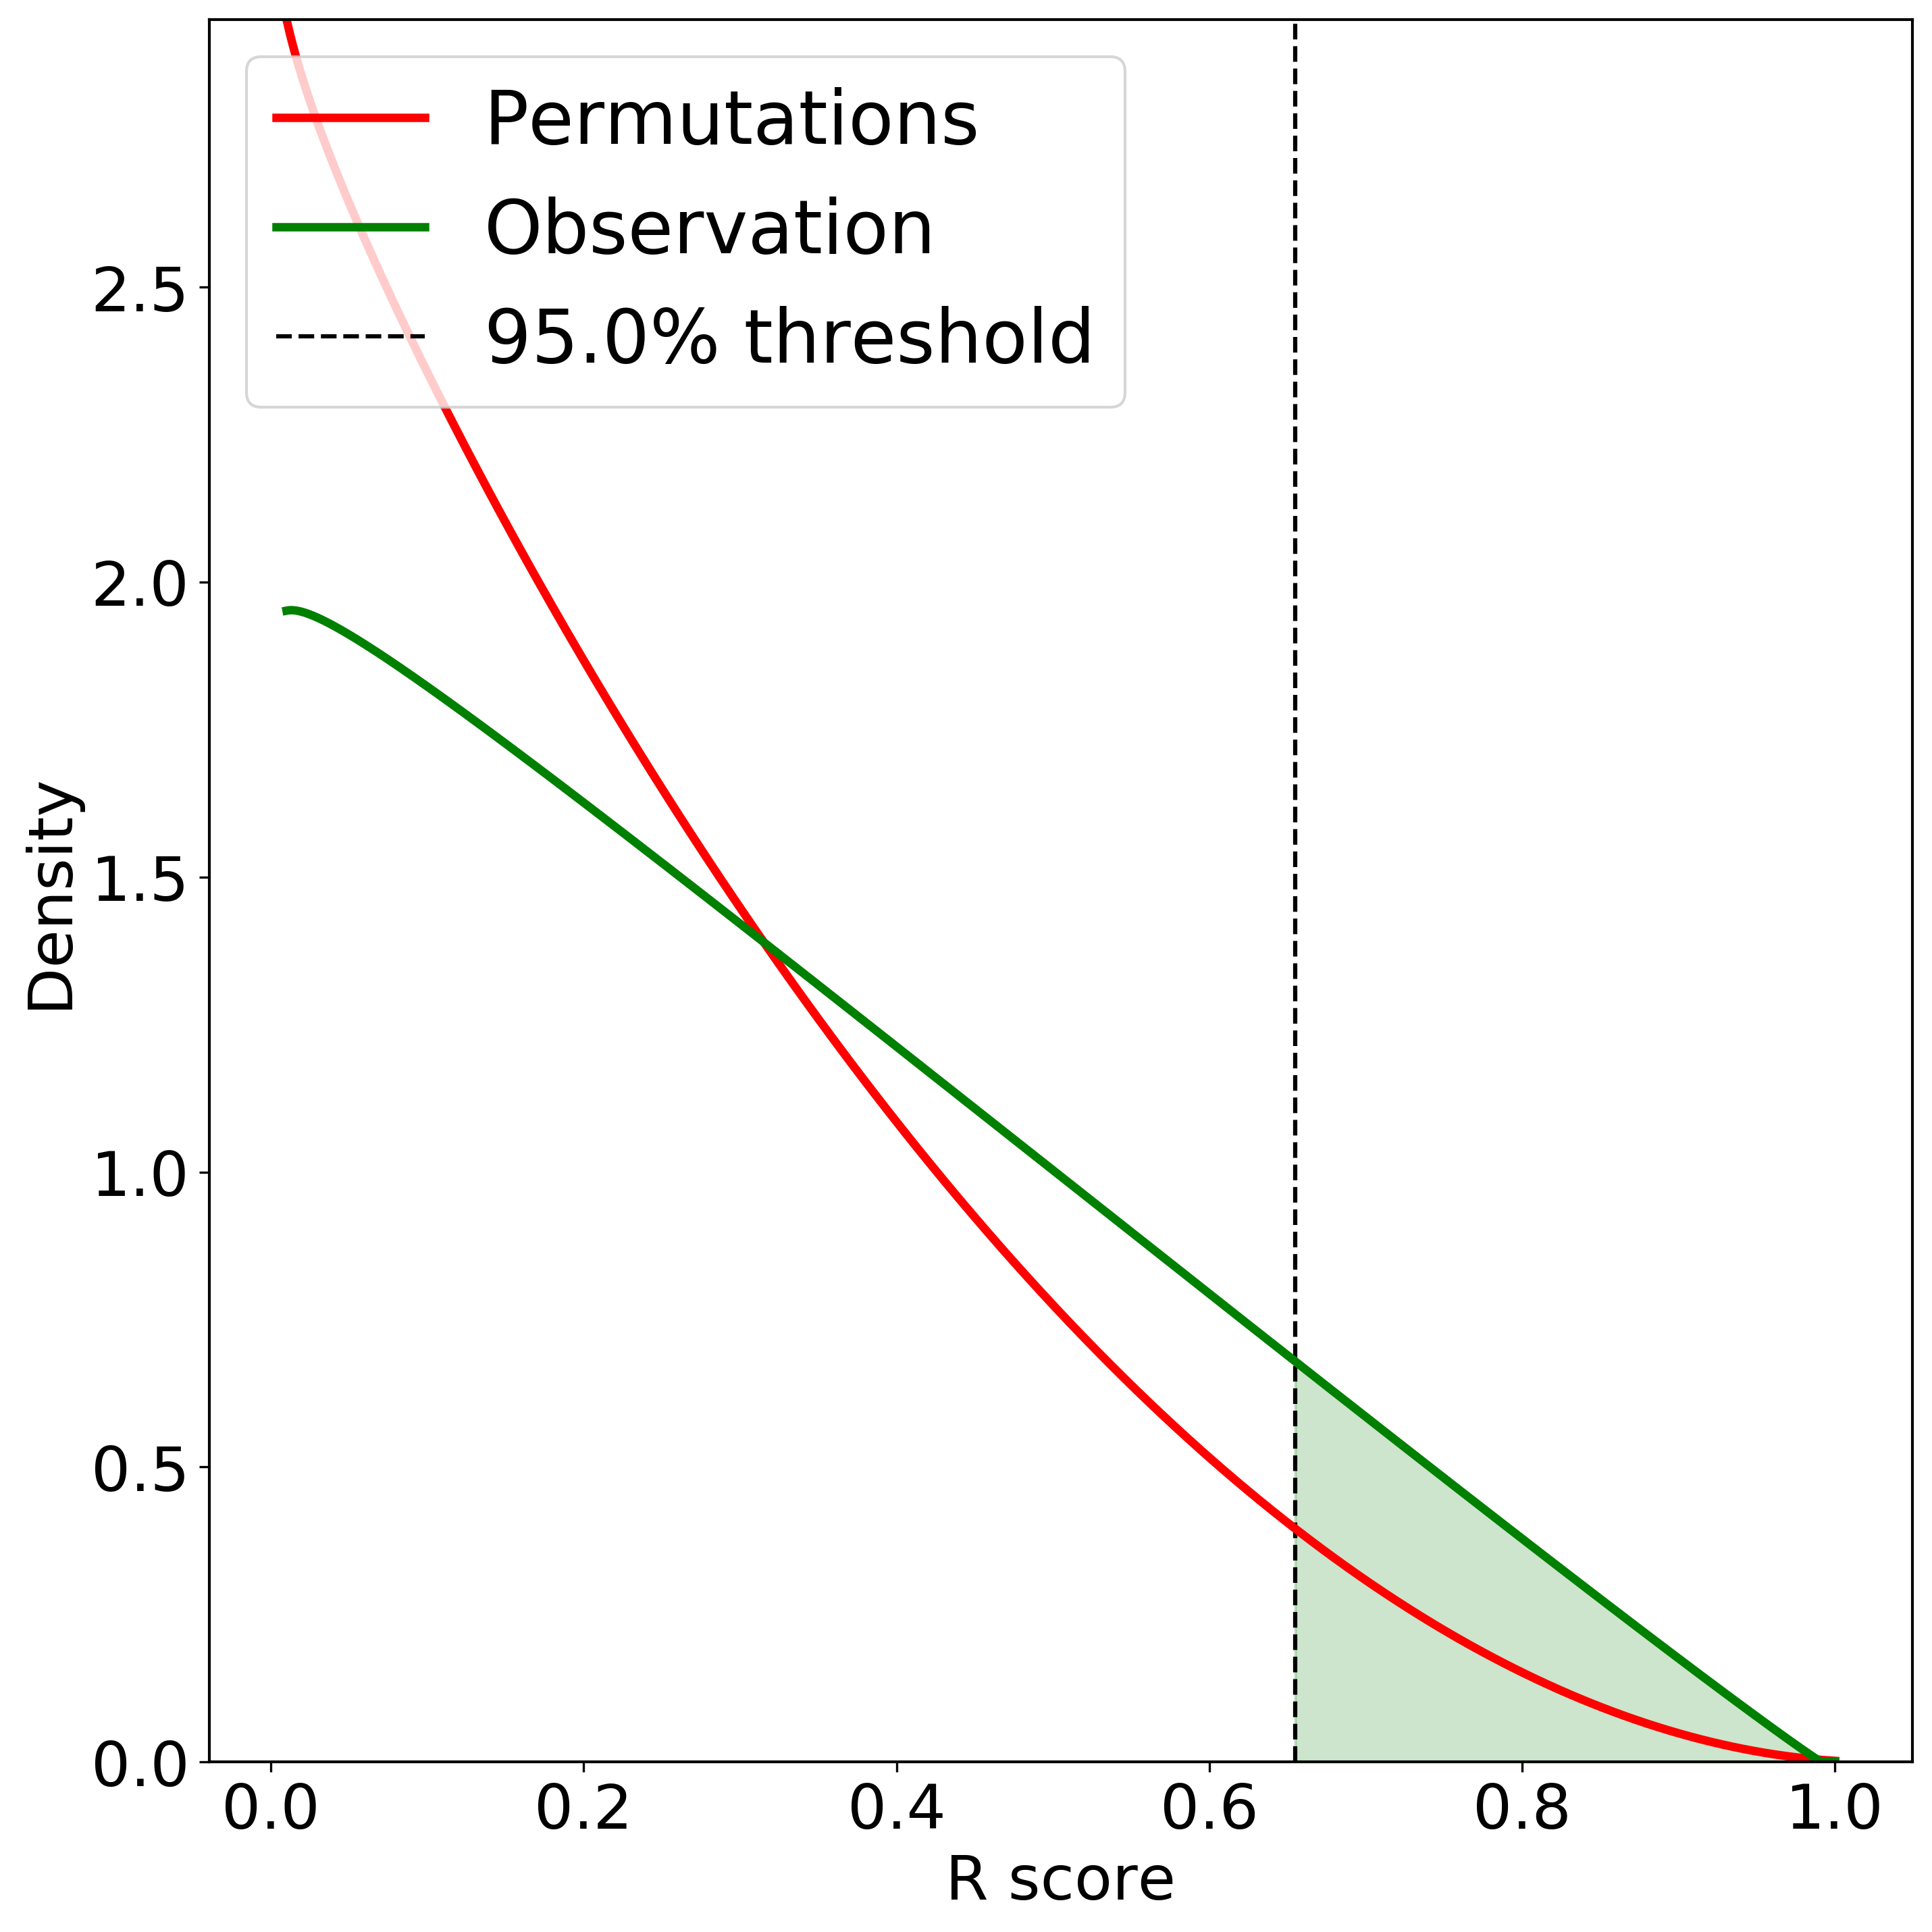

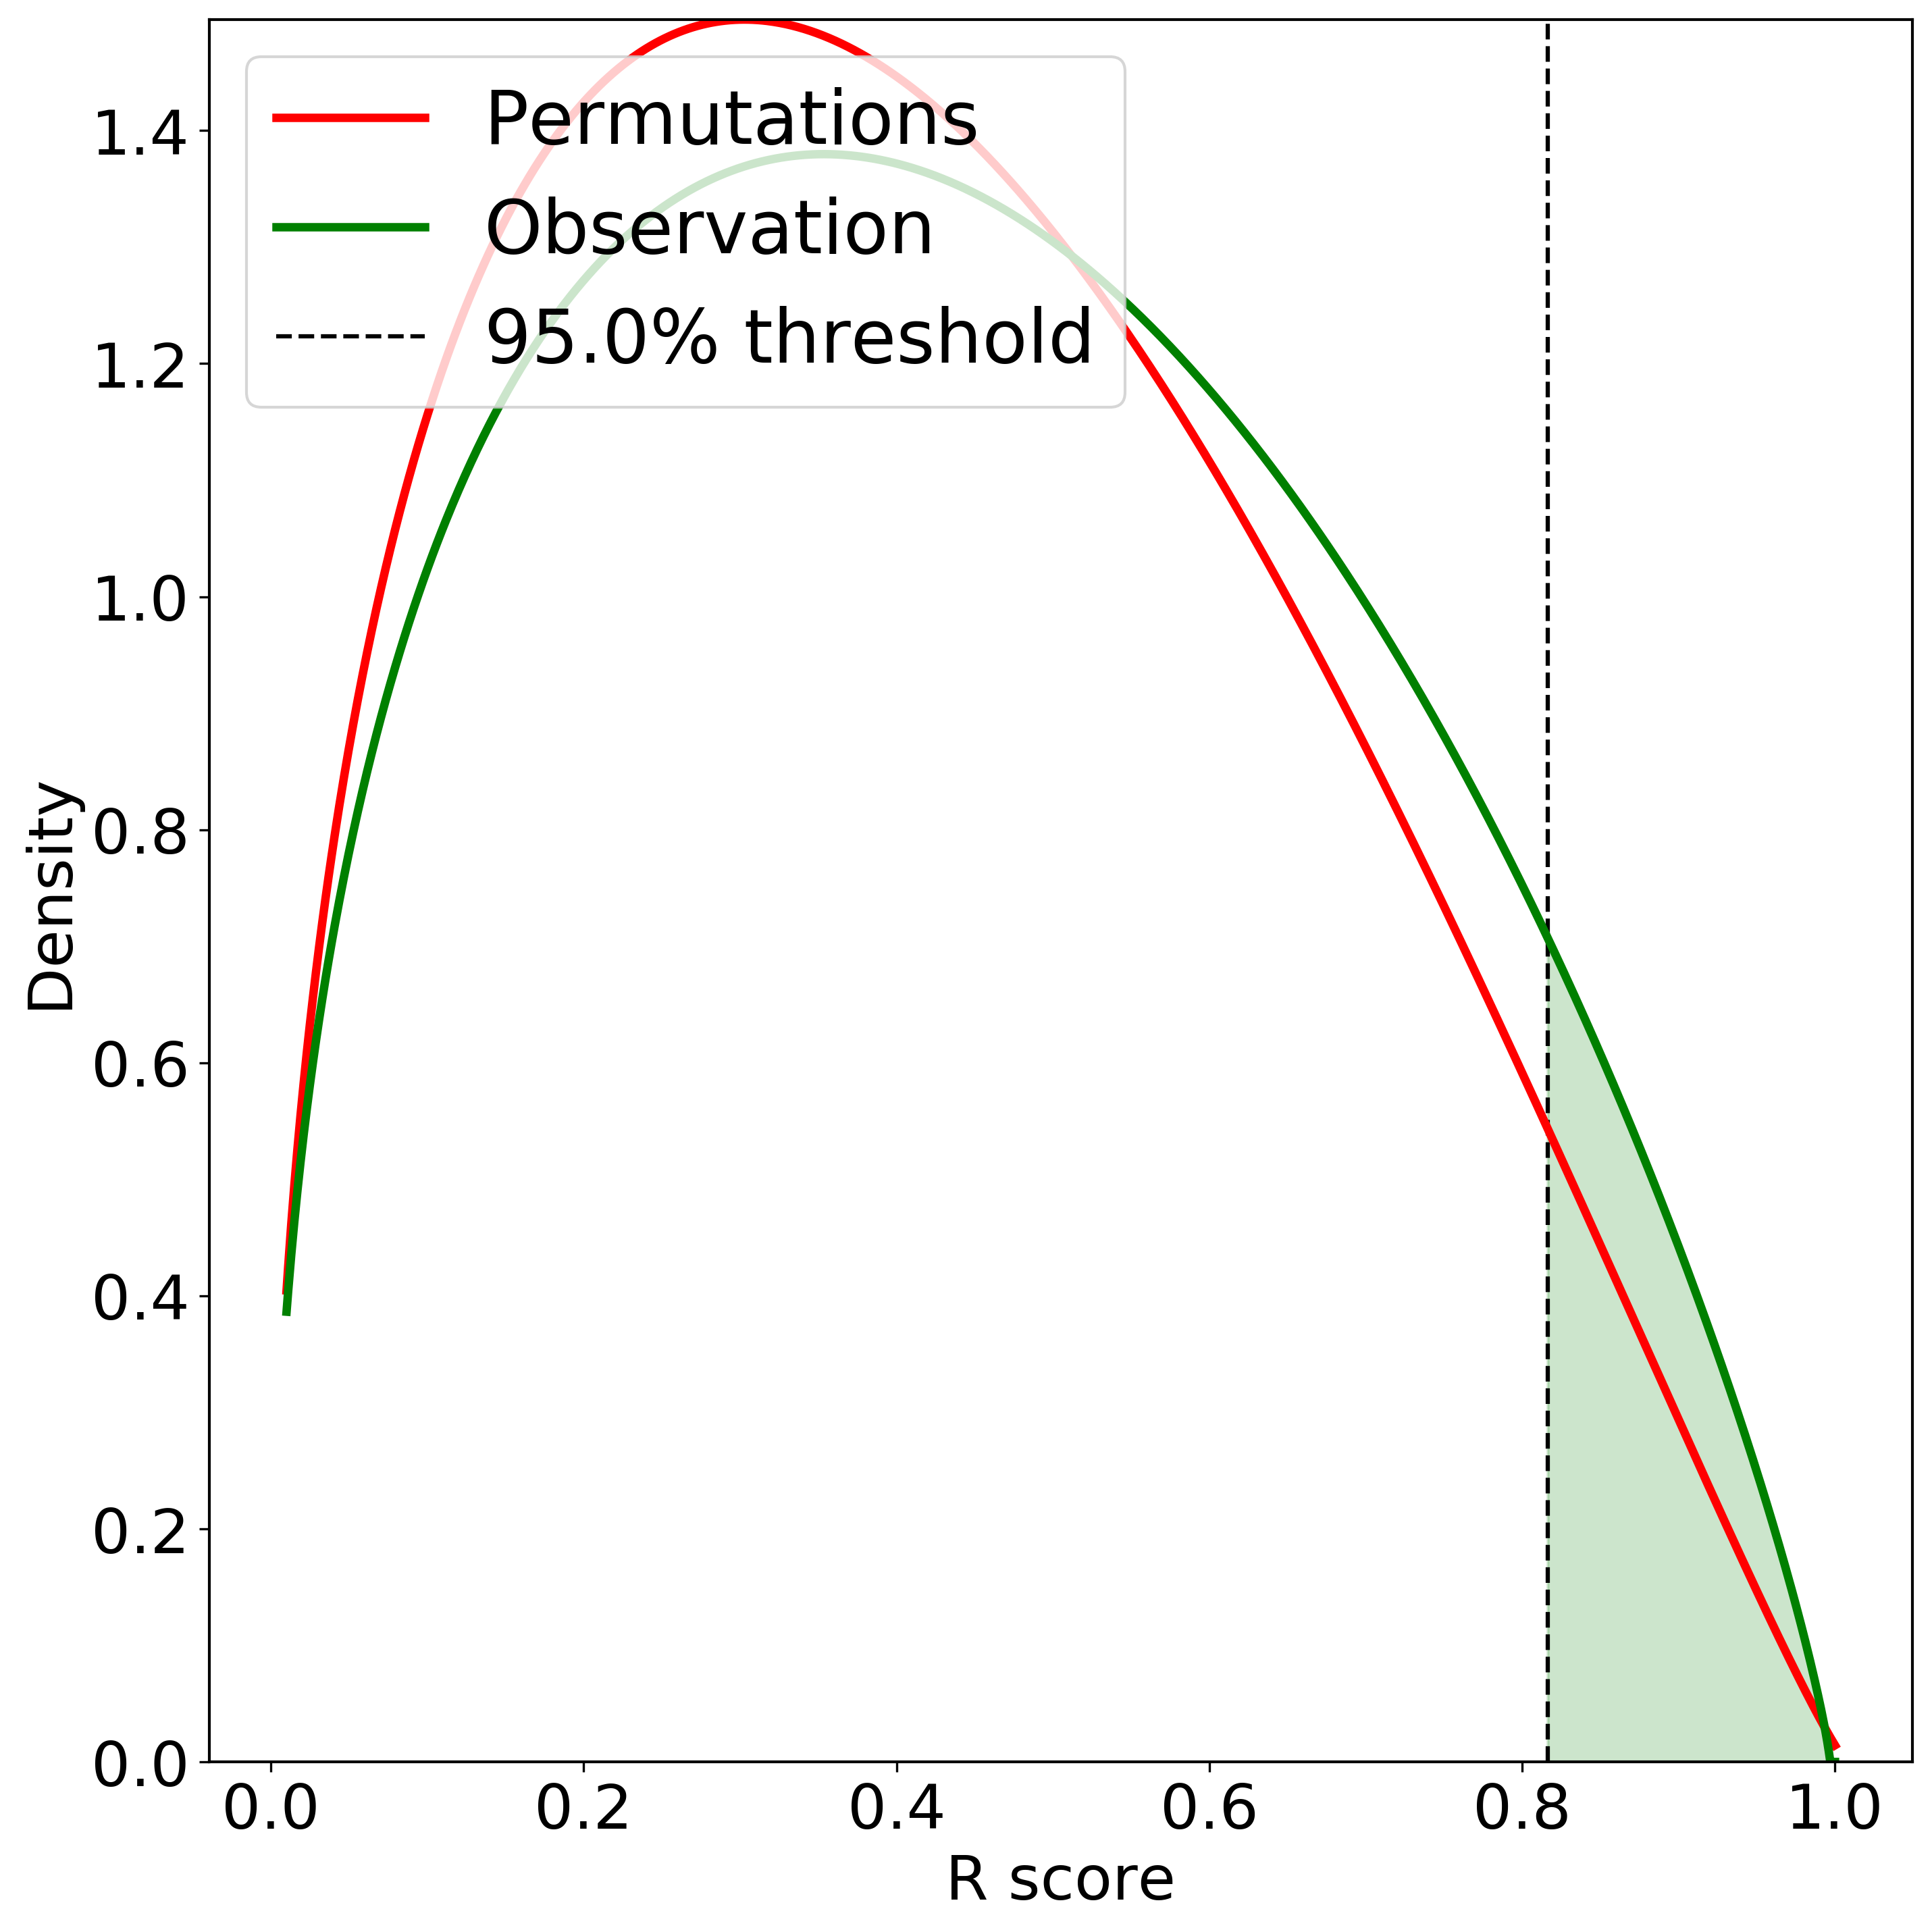

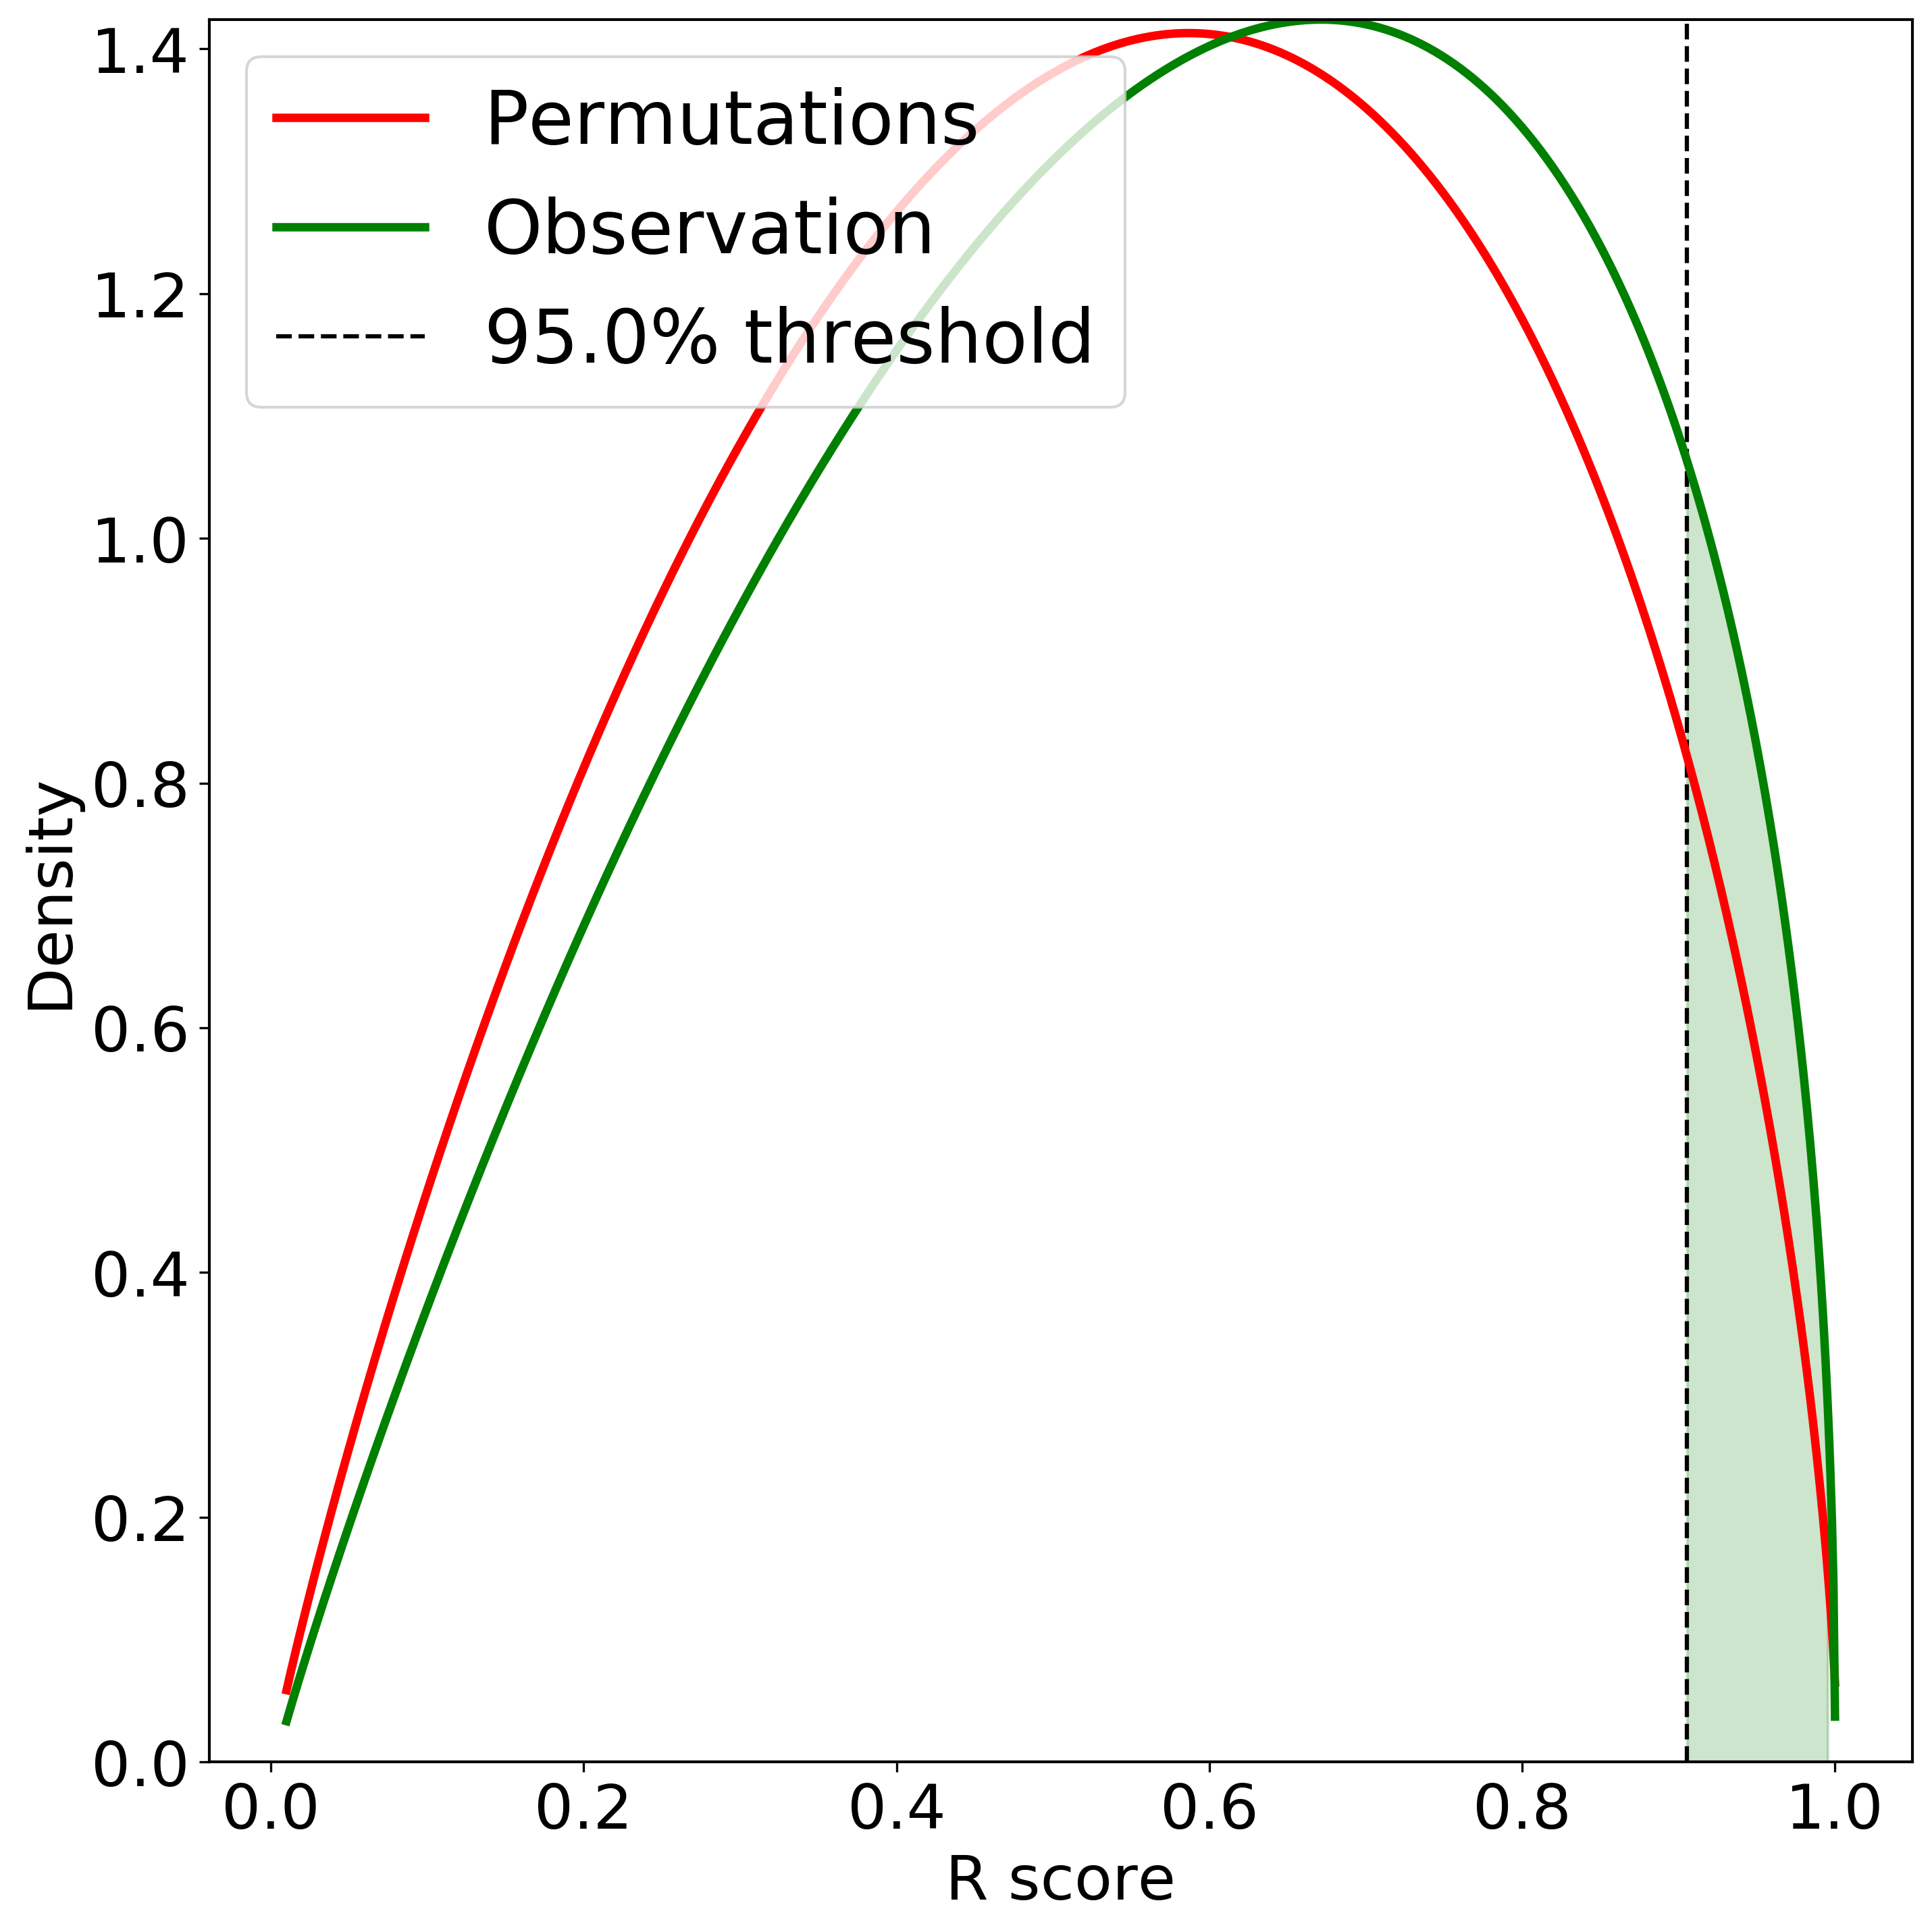

In [10]:
models_pvalue_tr=pa_transcriptome.plot_gof(poly_obs_scores_tr, sig_obs_scores_tr, poly_perm_scores_tr, sig_perm_scores_tr, dist_obs=False, dist_perm=False)

In [11]:
models_pvalue_tr

{'sigmoidal': [161653619000.0, 0.0, 0.7683400151967884],
 1: [189981866000.0, 0.0, 0.4390401152850431],
 2: [182435986500.0, 0.0, 0.6548541370276811],
 3: [165278904500.0, 9.140137765048477e-82, 0.8163118824200291],
 4: [167855334500.0, 3.912241226460917e-124, 0.905345892917967]}

## Cluster genes

In [12]:
genes_clusters_tr=pa_transcriptome.cluster_genes(scores_tr)

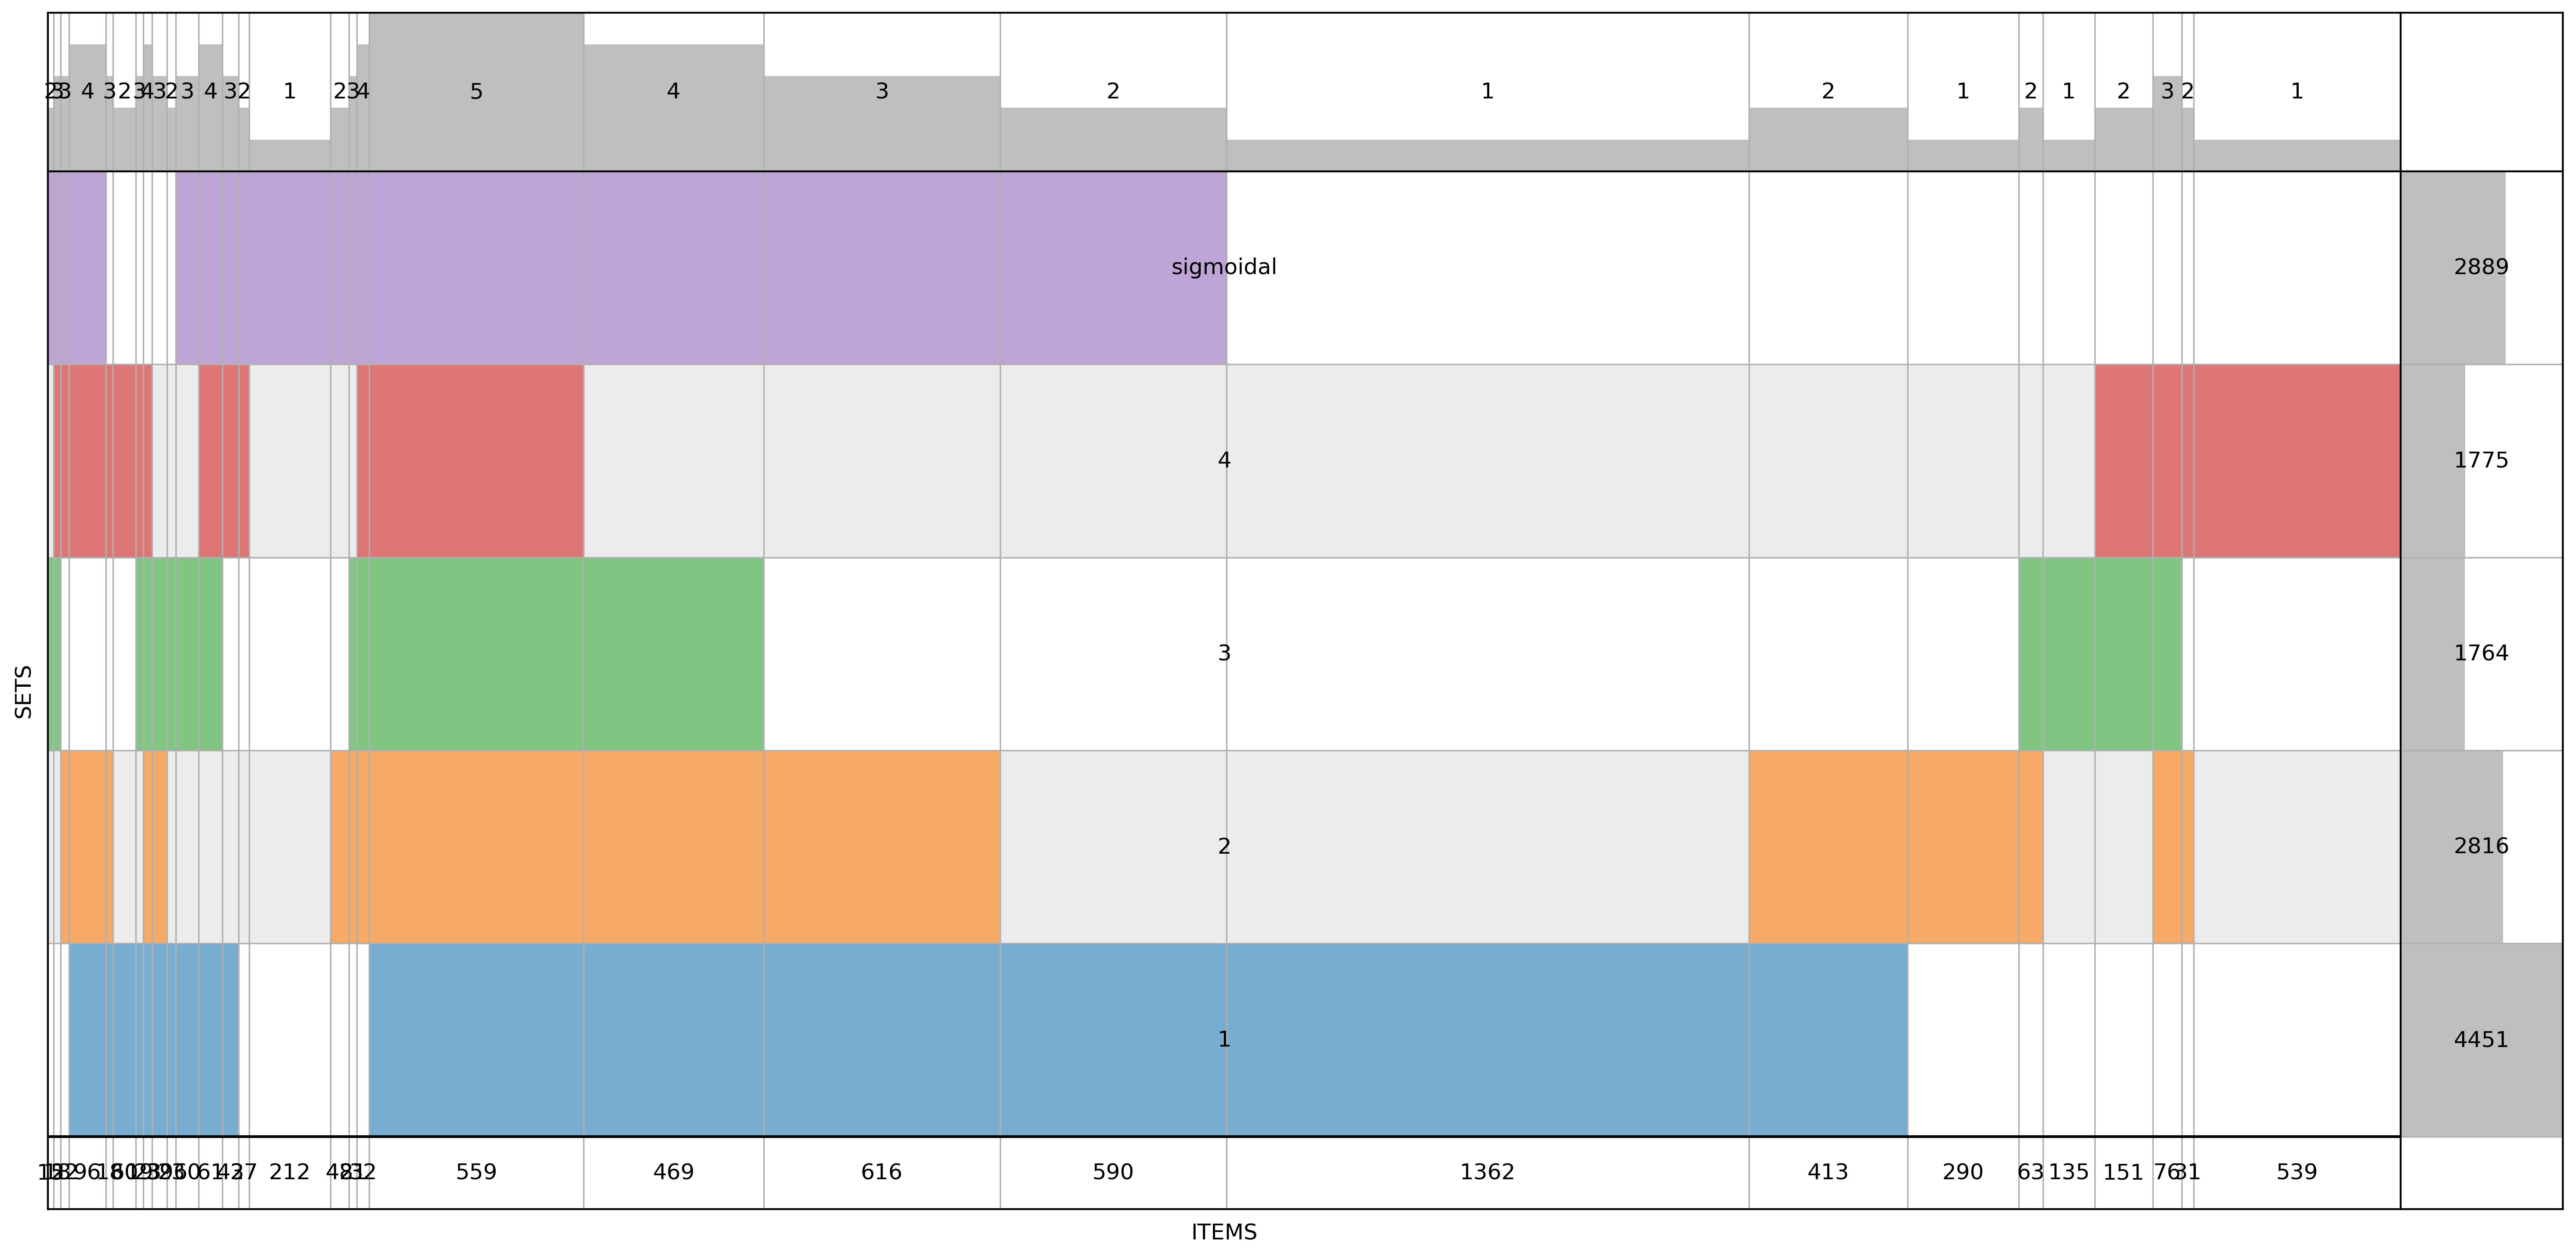

In [13]:
pa_transcriptome.plot_clusters(genes_clusters_tr)

In [14]:
summary_tr=pa_transcriptome.get_summary_table(genes_clusters_tr, scores_tr)

In [15]:
continuum_tr, sigmoid_tr, discarded_tr = pa_transcriptome.classify_genes(summary_tr)

/home/ieo5417/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/ieo5417/.local/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/home/ieo5417/.local/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

## Plot distribution of inflexion points for sigmoid genes

<lambdifygenerated-1>:3: RuntimeWarning: overflow encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-1>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-1>:3: RuntimeWarning: overflow encountered in exp
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)


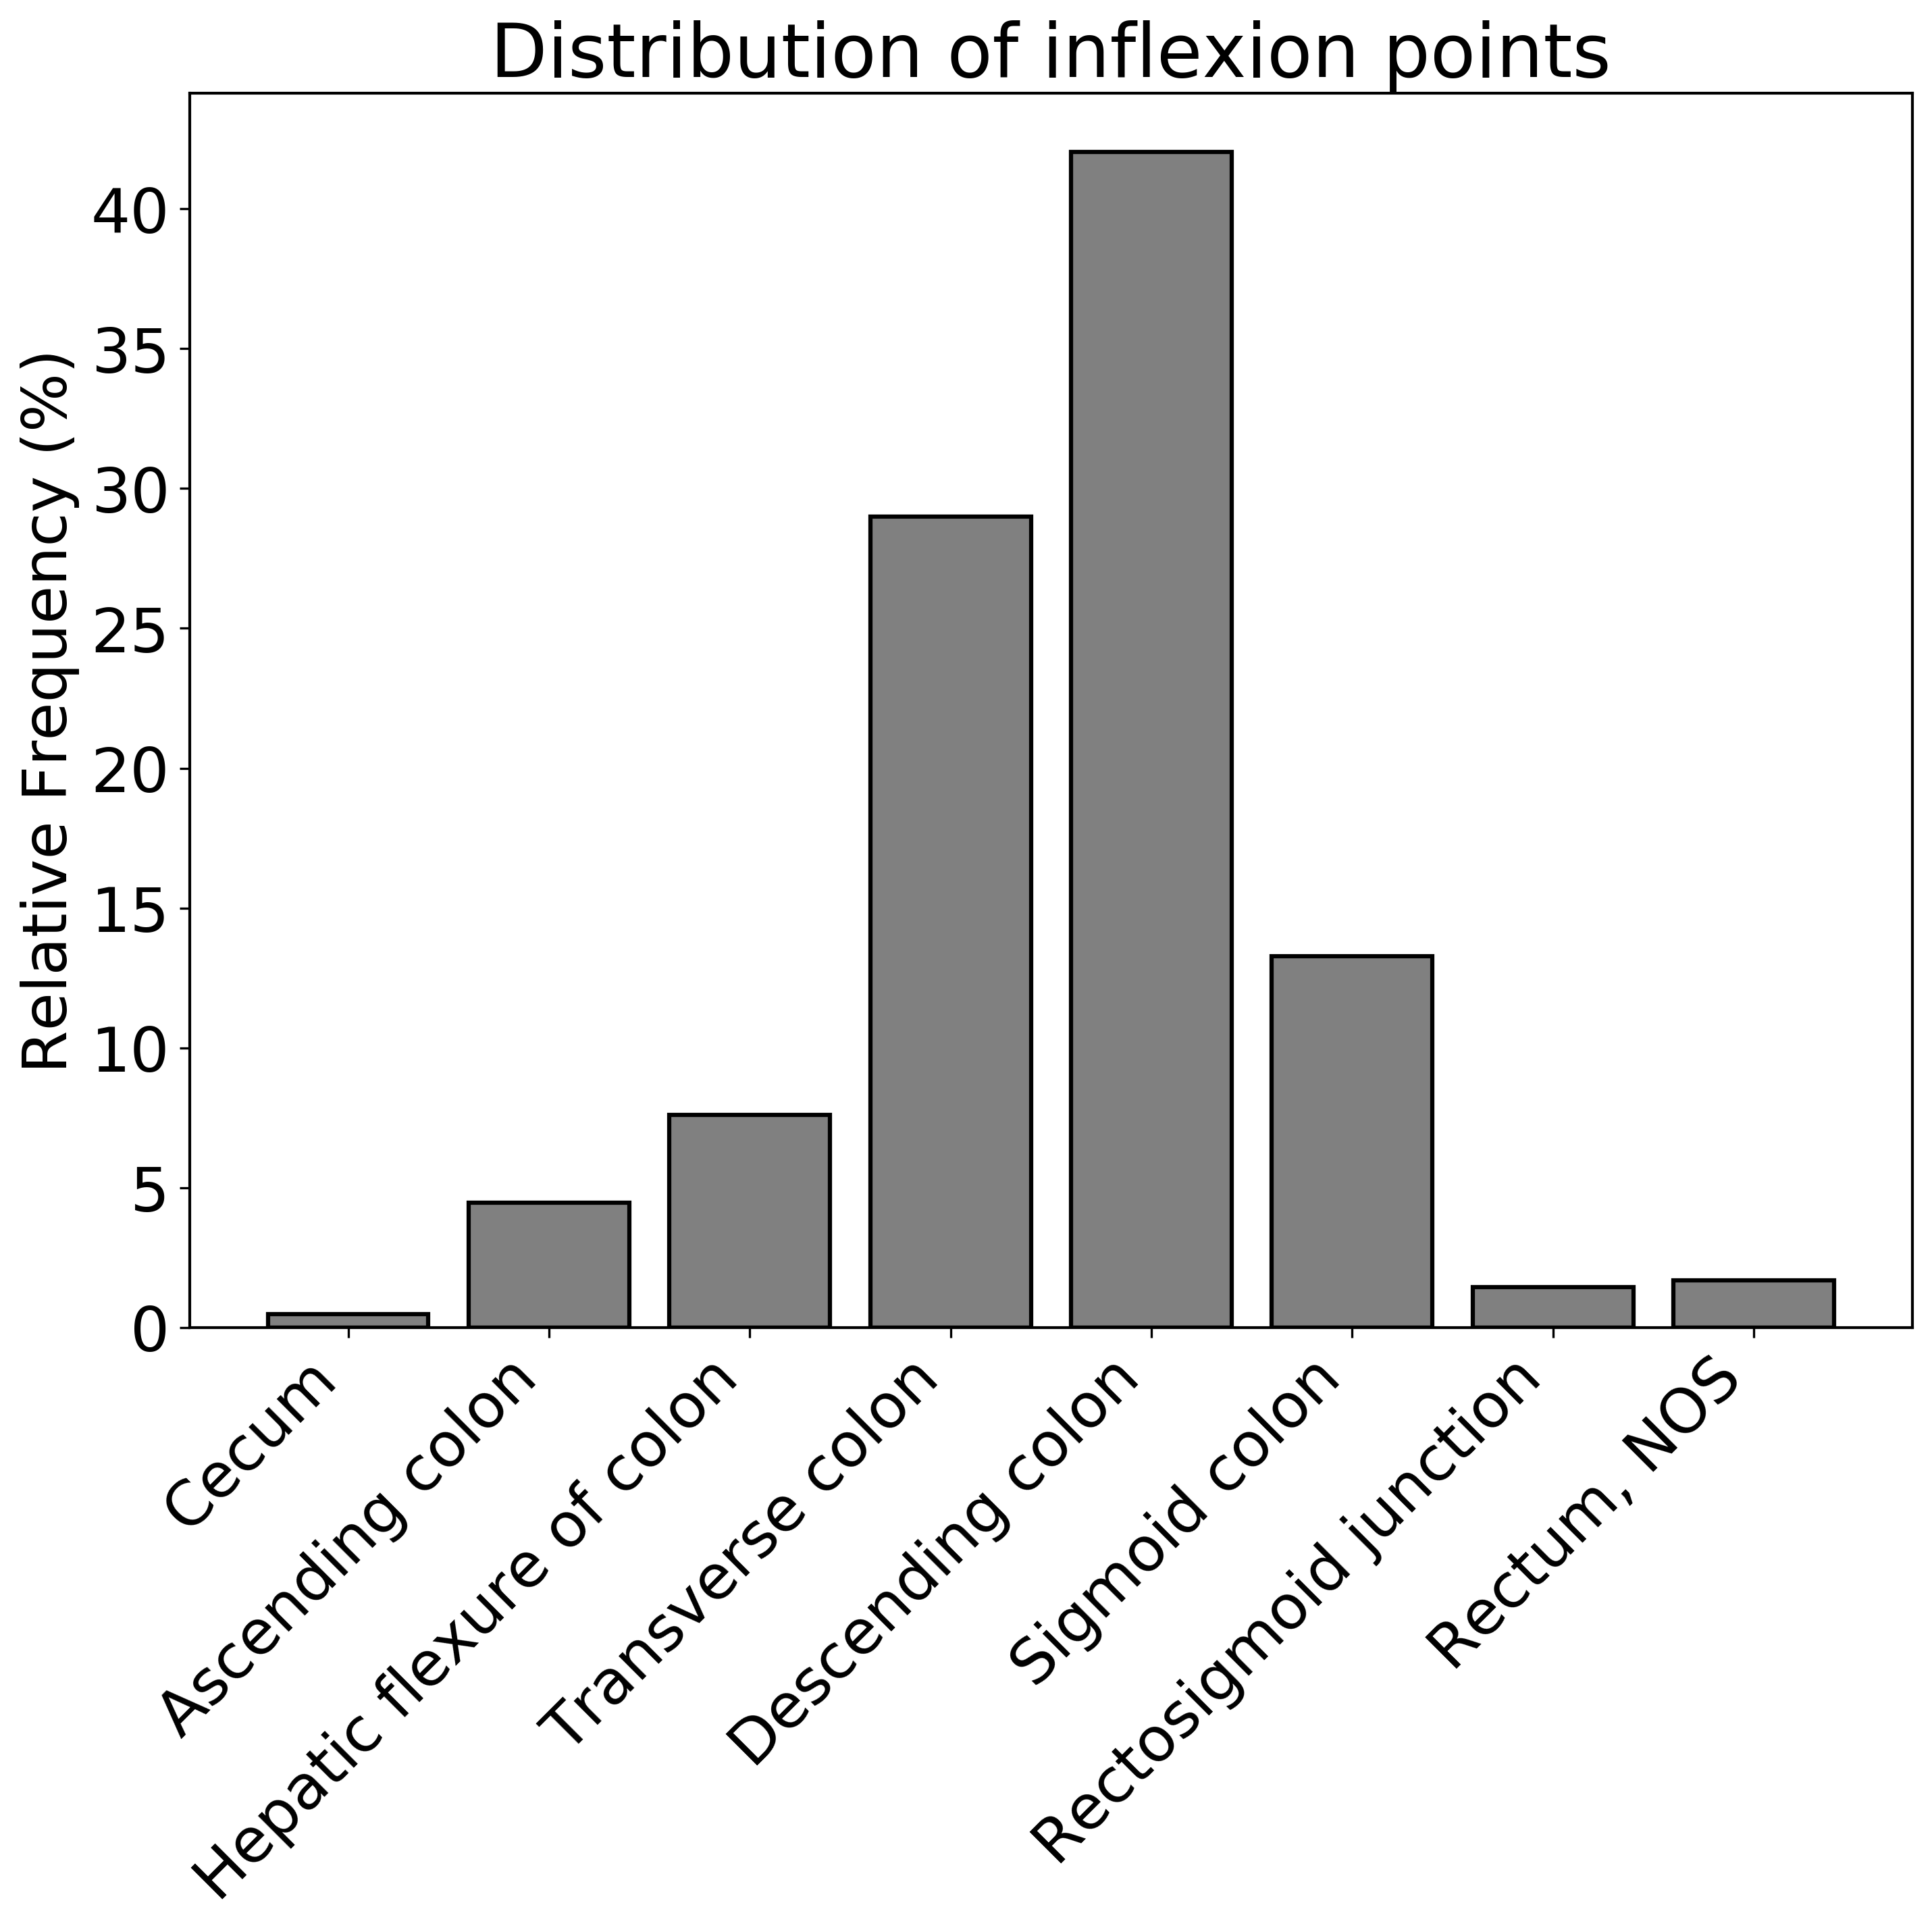

In [16]:
gene_list_tr, section_l_tr = pa_transcriptome.strict_sig_list(sigmoid_tr, sig_models_tr, plot_dist = True)

## Plot distribution of inflexion points for random permutation

<lambdifygenerated-2>:3: RuntimeWarning: overflow encountered in exp
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-2>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)
<lambdifygenerated-2>:3: RuntimeWarning: overflow encountered in double_scalars
  return (c*k*exp(-k*(x - x0))/(1 + exp(-k*(x - x0)))**2)


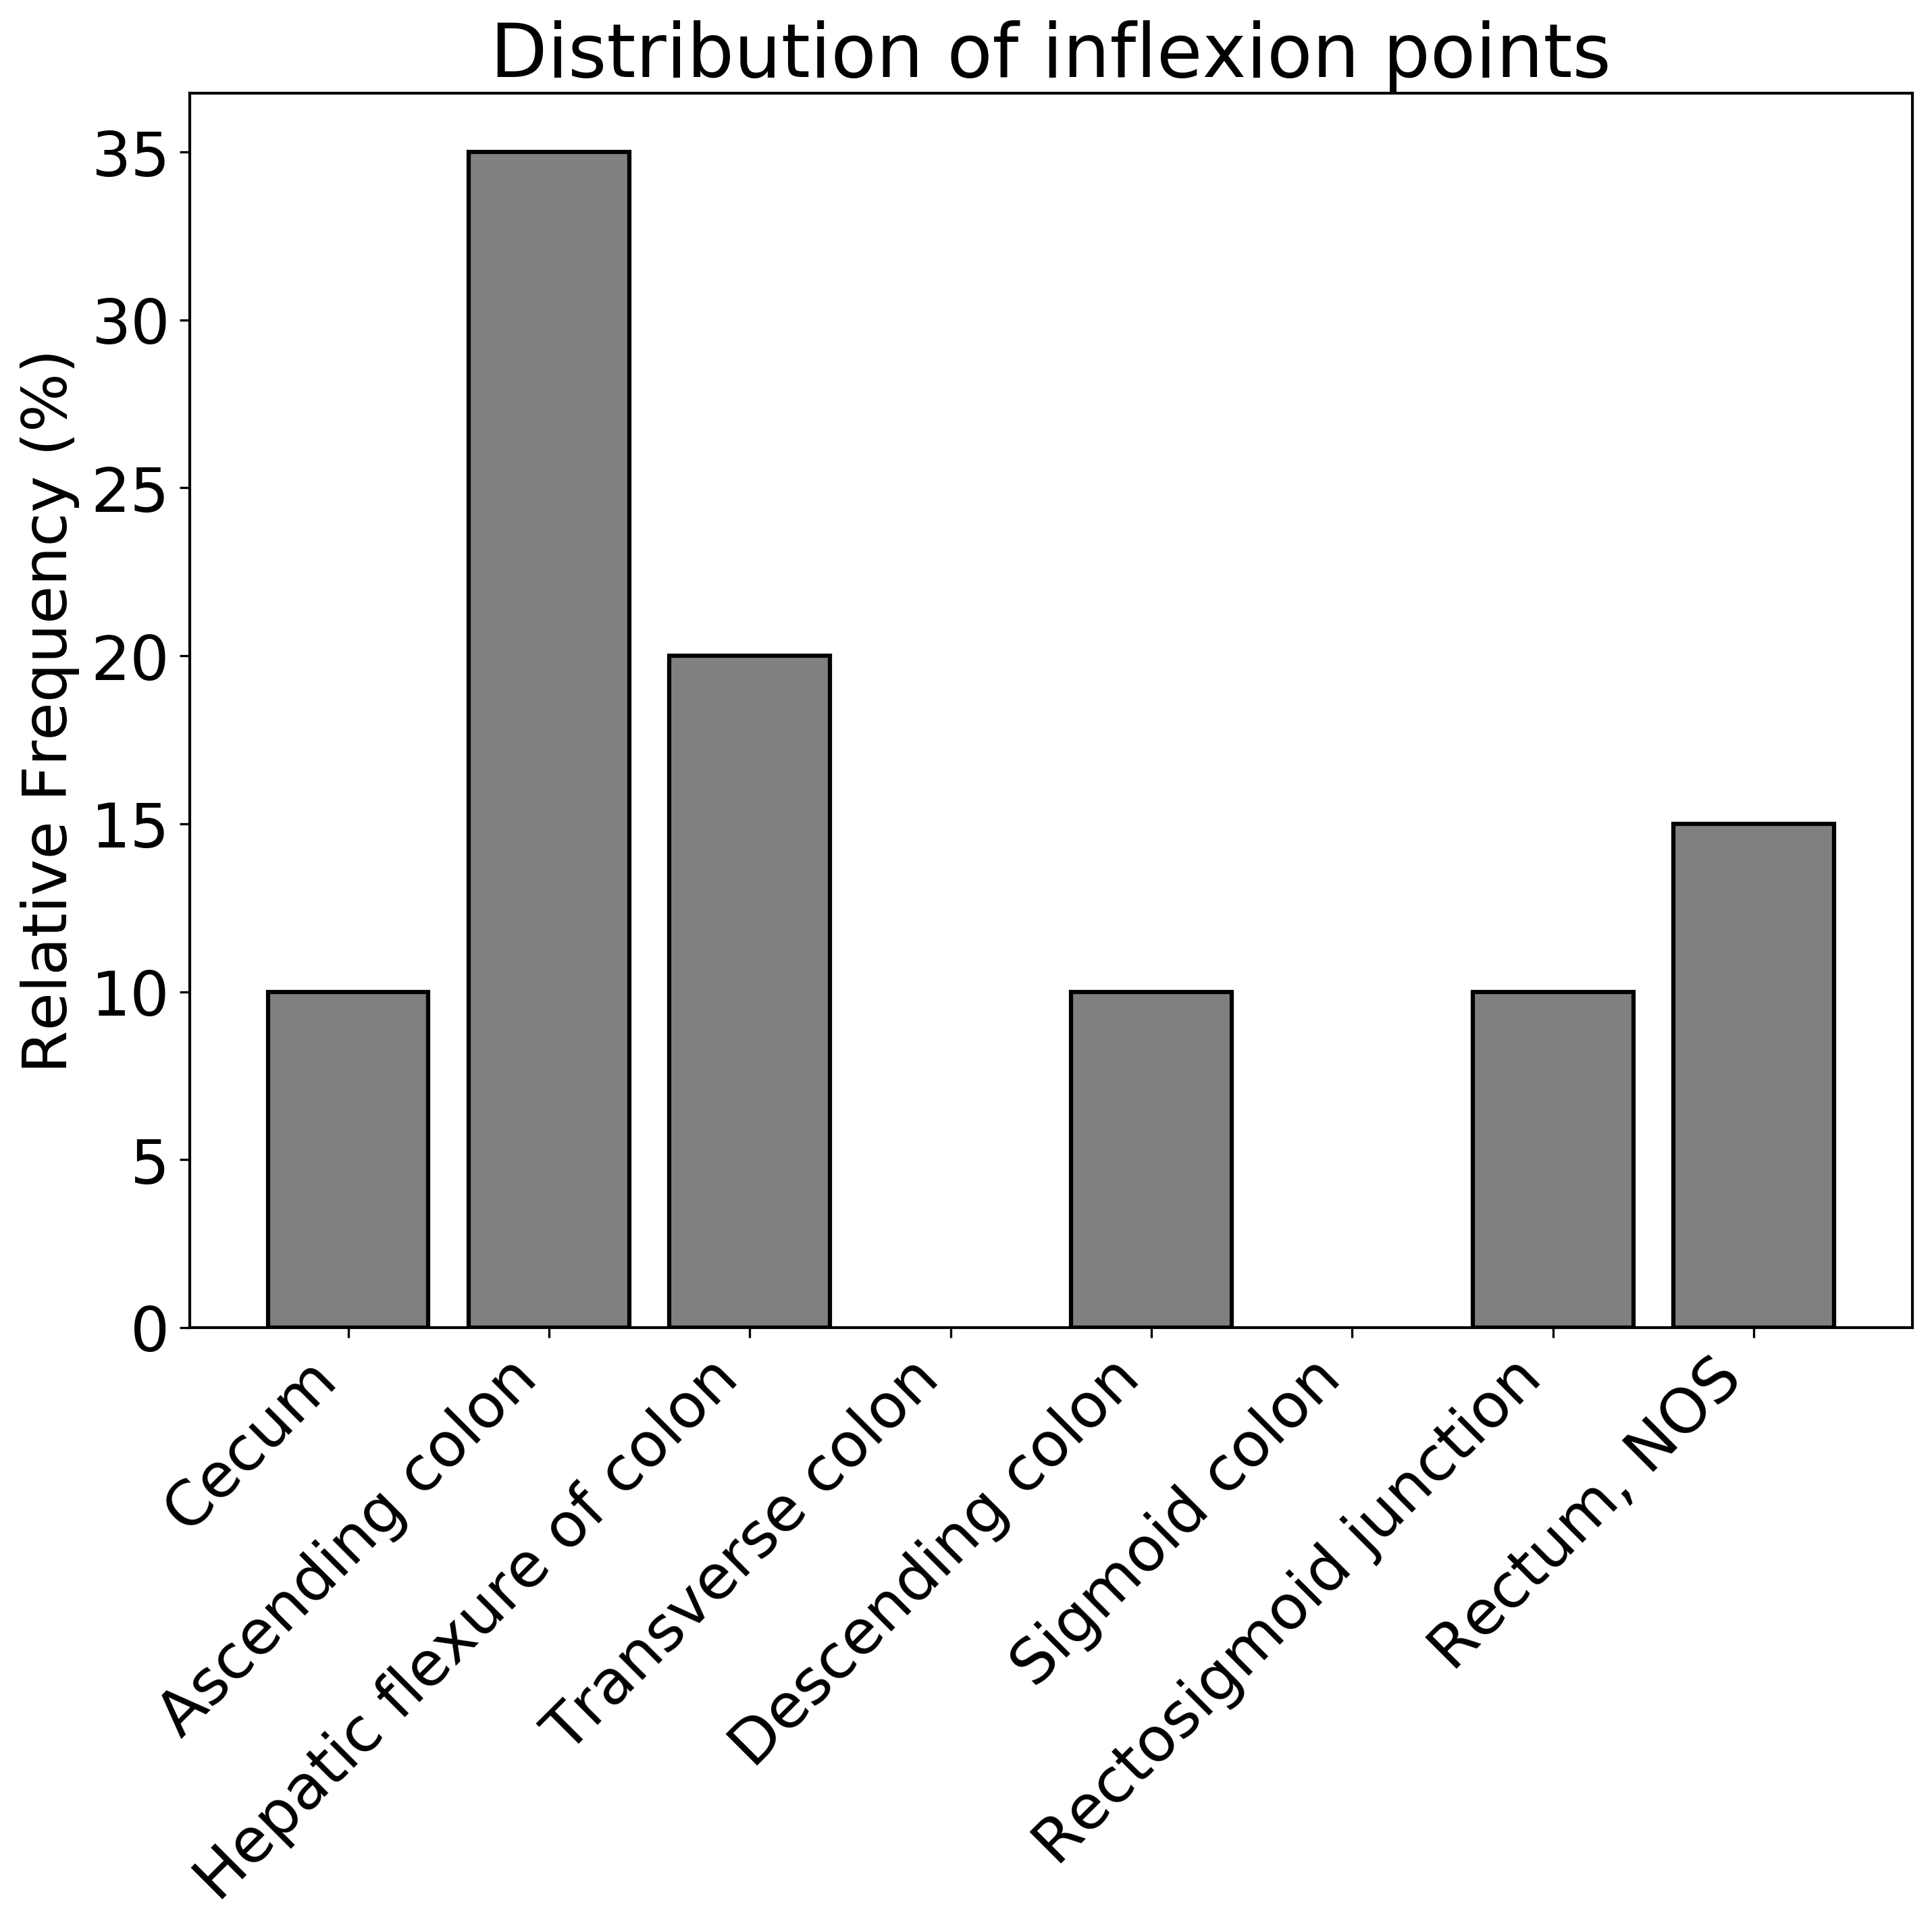

In [17]:
pa_transcriptome.strict_sig_list_random(medians_tr, mad_tr, sigmoid_tr, sig_models_tr, plot_dist = True)